### Import libraries and data

In [3]:
import great_expectations as ge
import pandas as pd

In [ ]:
url = "https://github.com/hnawaz007/pythondataanalysis/blob/main/ETL%20Pipeline/Pytest/Session%20one/Product.xlsx?raw=true"
# read from url
df=pd.read_excel(url)
df.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,...,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,EnglishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,NaN,NaN,Adjustable Race,NaN,0,NaN,1000,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current
1,2,BA-8327,NaN,NaN,NaN,Bearing Ball,NaN,0,NaN,1000,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current
2,3,BE-2349,NaN,NaN,NaN,BB Ball Bearing,NaN,0,NaN,800,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current
3,4,BE-2908,NaN,NaN,NaN,Headset Ball Bearings,NaN,0,NaN,800,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current
4,5,BL-2036,NaN,NaN,NaN,Blade,NaN,0,NaN,800,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current


### Convert pandas dataframe to Great Expectation

In [ ]:
my_df = ge.from_pandas(df)

In [ ]:
type(my_df)

great_expectations.dataset.pandas_dataset.PandasDataset

### GE Data Quality Tests

In [ ]:
# check number of rows in the dataset
my_df.expect_table_row_count_to_equal(1000)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": false,
  "result": {
    "observed_value": 606
  },
  "meta": {}
}

### Primary Key Test

In [ ]:
my_df.expect_column_to_exist('ProductKey')

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {},
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_be_unique('ProductKey')

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_not_be_null('ProductKey')

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_be_in_type_list("ProductKey", ["int", "int64"])

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "observed_value": "int64"
  },
  "meta": {}
}

### Test values in a set (list)

In [ ]:
df.ProductLine.unique()

array([nan, 'R ', 'S ', 'M ', 'T '], dtype=object)

In [ ]:
my_df.expect_column_values_to_be_in_set("ProductLine", ['R ', 'S ', 'M ', 'T '])

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "missing_count": 226,
    "missing_percent": 37.29372937293729,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_be_in_set("Color", [ 'Black', 'Silver', 'Red', 'White', 'Blue', 'Multi', 'Yellow','Grey', 'Silver'])

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": false,
  "result": {
    "element_count": 606,
    "missing_count": 254,
    "missing_percent": 41.914191419141915,
    "unexpected_count": 7,
    "unexpected_percent": 1.9886363636363635,
    "unexpected_percent_total": 1.155115511551155,
    "unexpected_percent_nonmissing": 1.9886363636363635,
    "partial_unexpected_list": [
      "Silver/Black",
      "Silver/Black",
      "Silver/Black",
      "Silver/Black",
      "Silver/Black",
      "Silver/Black",
      "Silver/Black"
    ]
  },
  "meta": {}
}

### Check min and Max range of column

In [ ]:
df.SafetyStockLevel.unique()

array([1000,  800,  500,   60,    4,  100], dtype=int64)

In [ ]:
my_df.expect_column_max_to_be_between("SafetyStockLevel", 1, 1000)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "observed_value": 1000,
    "element_count": 606,
    "missing_count": null,
    "missing_percent": null
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_max_to_be_between("DaysToManufacture", 1, 10)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "observed_value": 4,
    "element_count": 606,
    "missing_count": null,
    "missing_percent": null
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_mean_to_be_between("StandardCost", 100, 500)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "observed_value": 434.26582886075965,
    "element_count": 606,
    "missing_count": 211,
    "missing_percent": 34.81848184818482
  },
  "meta": {}
}

### Test Text columns (Nulls)

In [ ]:
my_df.expect_column_values_to_not_be_null('EnglishProductName')

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_not_be_null("Color", mostly=0.55)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "unexpected_count": 254,
    "unexpected_percent": 41.914191419141915,
    "unexpected_percent_total": 41.914191419141915,
    "partial_unexpected_list": []
  },
  "meta": {}
}

### Save your test cases and re-use

In [ ]:
my_df.get_expectations_config()

{
  "ge_cloud_id": null,
  "expectations": [
    {
      "meta": {},
      "kwargs": {
        "column": "ProductKey"
      },
      "expectation_type": "expect_column_to_exist"
    },
    {
      "meta": {},
      "kwargs": {
        "column": "ProductKey"
      },
      "expectation_type": "expect_column_values_to_be_unique"
    },
    {
      "meta": {},
      "kwargs": {
        "column": "ProductKey"
      },
      "expectation_type": "expect_column_values_to_not_be_null"
    },
    {
      "meta": {},
      "kwargs": {
        "column": "ProductKey",
        "type_list": [
          "int",
          "int64"
        ]
      },
      "expectation_type": "expect_column_values_to_be_in_type_list"
    },
    {
      "meta": {},
      "kwargs": {
        "column": "ProductLine",
        "value_set": [
          "R ",
          "S ",
          "M ",
          "T "
        ]
      },
      "expectation_type": "expect_column_values_to_be_in_set"
    },
    {
      "meta": {},
      "kwarg

In [ ]:
config = my_df.get_expectations_config()

In [ ]:
my_df.save_expectation_suite('product.data.expectations.json')

In [ ]:
df2 = ge.read_excel(url)

In [ ]:
df2.validate(expectation_suite=config)

{
  "success": true,
  "results": [
    {
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "expectation_config": {
        "meta": {},
        "kwargs": {
          "column": "ProductKey"
        },
        "expectation_type": "expect_column_to_exist"
      },
      "success": true,
      "result": {},
      "meta": {}
    },
    {
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "expectation_config": {
        "meta": {},
        "kwargs": {
          "column": "ProductKey"
        },
        "expectation_type": "expect_column_values_to_be_unique"
      },
      "success": true,
      "result": {
        "element_count": 606,
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_total": 0.0,
  

### Test with Config file

In [ ]:
#
test_results = df2.validate(expectation_suite="product.data.expectations.json")

In [ ]:
# Take action based on the results
if test_results["success"]:
    print ("Awesome. All Data Quality Tests are green!")
else:
    raise Exception("You've got issues.")

Awesome. All Data Quality Tests are green!


tutorial: https://github.com/prodramp/publiccode/tree/master/python/greatexpectation-work

library: https://github.com/great-expectations/great_expectations 


In [5]:
mydf=ge.read_csv("/Users/ikawahyuni/dataquality/accounts.csv")
print(mydf)

  Customer_ID                              Name                  Phone
0   CUST00001                          Hall Ltd       243.828.4664x425
1   CUST00002                    Jones and Sons           364.741.7637
2   CUST00003                        Sims-Payne  +1-373-579-1795x47644
3   CUST00004                      Roman-Graham      247.448.0091x3707
4   CUST00005  Rodriguez, Campbell and Sullivan     401.745.5207x11263


In [20]:
#Data Quality check: Columns, Null
import great_expectations as ge
import pandas as pd
import os
from great_expectations.dataset import PandasDataset

# Path to your CSV files
path = "/Users/ikawahyuni/dataquality/"

# Mapping of CSV files to their expected columns
file_to_expected_columns = {
    "accounts.csv": ["Customer_ID", "Name", "Phone"],
    "contacts.csv": ["FirstName", "LastName", "Email", "Customer_ID"],
    "cases.csv": ["Type", "Customer_ID", "ContactEmail"]
}

# Initialize a list to collect validation summaries
validation_summaries = []

# Iterate over each file and its expected columns
for file_name, expected_columns in file_to_expected_columns.items():
    # Read the CSV file into a Great Expectations PandasDataset
    file_path = os.path.join(path, file_name)
    df = pd.read_csv(file_path)
    dataset = PandasDataset(df)

    # Dynamically add expectations for each column
    for column in expected_columns:
        dataset.expect_column_to_exist(column)
        dataset.expect_column_values_to_not_be_null(column)

    # Validate the dataset and collect results
    results = dataset.validate()
    validation_summary = {
        "file_name": file_name,
        "success": results["success"],
        "results": results["results"],
        "statistics": results["statistics"]
    }
    validation_summaries.append(validation_summary)

# Convert the summaries into a DataFrame for easy viewing
results_df = pd.DataFrame(validation_summaries, columns=["file_name", "success", "statistics"])

print(results_df)


      file_name  success                                         statistics
0  accounts.csv     True  {'evaluated_expectations': 6, 'successful_expe...
1  contacts.csv     True  {'evaluated_expectations': 8, 'successful_expe...
2     cases.csv     True  {'evaluated_expectations': 6, 'successful_expe...


In [3]:
from simple_salesforce import Salesforce

In [6]:
token= 'xrBaX9uYgjfWhNR4pH7AR9PI'
ps='2097@Hilm'
token2='1ac0iQrzw1gIQxNHjJniqvHNS'

sf = Salesforce(username='master.alex7@gmail.com', password=ps, security_token=token)
query_result=sf.query_all("select Email from Contact")
emails = [record['Email'] for record in query_result['records']]
emails = "\n".join(emails)
print(emails)


master.alex@gmail.com


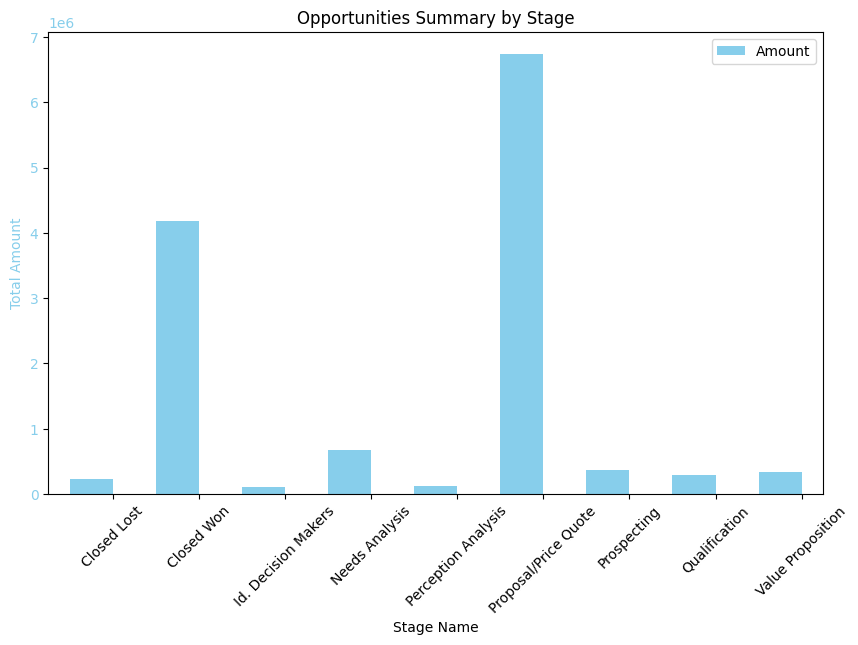

In [11]:
from simple_salesforce import Salesforce
import pandas as pd

sf = Salesforce(username='master.alex10@gmail.com', password=ps, security_token=token2)
query = """
SELECT Name, StageName, Amount, CloseDate
FROM Opportunity
"""

opportunities = sf.query_all(query)
opportunities_df = pd.DataFrame(opportunities['records']).drop(columns='attributes')

opportunities_df['CloseDate'] = pd.to_datetime(opportunities_df['CloseDate'])
summary_by_stage = opportunities_df.groupby('StageName').agg({'Amount': 'sum', 'Name': 'count'}).rename(columns={'Name': 'OpportunityCount'}).reset_index()

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
summary_by_stage.plot(kind='bar', x='StageName', y='Amount', ax=ax1, color='skyblue', position=1, title="Opportunities Summary by Stage")

ax1.set_xlabel('Stage Name')
ax1.set_ylabel('Total Amount', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

plt.xticks(rotation=45)
plt.show()


In [3]:
#create dummy data for Omni 4: 5k records
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker instance
fake = Faker()

# Constants
NUM_RECORDS = 10
CSV_FILE_NAME = '/Users/ikawahyuni/dataquality/dummy_data.csv'

# Function to generate random Date & Time
def random_date_time(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

# Function to generate random Time
def random_time():
    return datetime.strptime('{}:{}:{}'.format(random.randint(0, 23), random.randint(0, 59), random.randint(0, 59)), '%H:%M:%S').time()

# Define a date range for generating random Date & Time fields
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 1, 1)

# Create dummy data for Omni 4
dummy_data = {
    'CHANNEL NAME': [fake.text(max_nb_chars=25) for _ in range(NUM_RECORDS)],
    'CWC ID': [fake.random_number(digits=8, fix_len=True) for _ in range(NUM_RECORDS)],
    'DATE IN': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'PICKUP DATE': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'DATE SUBMIT': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'RESPONSE TIME': [random_time() for _ in range(NUM_RECORDS)],
    'TIME CONSUME': [random_time() for _ in range(NUM_RECORDS)],
    'CUST NAME': [fake.name() for _ in range(NUM_RECORDS)],
    'CUST HP': [fake.random_number(digits=13, fix_len=True) for _ in range(NUM_RECORDS)],
    'CUST PHONE1': [fake.random_number(digits=13, fix_len=True) for _ in range(NUM_RECORDS)],
    'CUST EMAIL': [fake.email() for _ in range(NUM_RECORDS)], # Generating as text since no specific pattern provided
    'CATEGORY': [fake.text(max_nb_chars=64) for _ in range(NUM_RECORDS)],
    'SUB CATEGORY': [fake.text(max_nb_chars=255) for _ in range(NUM_RECORDS)],
    'REMARK': [fake.text() for _ in range(NUM_RECORDS)], # Unlimited length handled by Faker's default behavior
    'FEEDBACK': [fake.text() for _ in range(NUM_RECORDS)], # Unlimited length handled by Faker's default behavior
    'PIC': [fake.text(max_nb_chars=64) for _ in range(NUM_RECORDS)],
    'AGENT ID': [fake.random_number(digits=8) for _ in range(NUM_RECORDS)], # Assuming it's not fixed length
    'STATUS': [fake.word() for _ in range(NUM_RECORDS)], # Assuming any text value is acceptable
    'SENTIMENT': [fake.text(max_nb_chars=32) for _ in range(NUM_RECORDS)],
}

# Convert to DataFrame
df = pd.DataFrame(dummy_data)

# Save to CSV
df.to_csv(CSV_FILE_NAME, index=False)

# Outputting the path to the saved file
CSV_FILE_NAME




'/Users/ikawahyuni/dataquality/dummy_data.csv'

In [42]:
#Dummy Data for Omni 4
#the datetime format should be "2024-03-05T06:31:36.000+0000" for date-time fields, and the time format should be "08:00:00.000Z" for time fields.

import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker instance
fake = Faker()

# Constants
NUM_RECORDS = 10
CSV_FILE_NAME = '/Users/ikawahyuni/dataquality/dummy_data_Omni4.csv'

# Function to generate random Date & Time in the specified format
def random_date_time(start, end):
    random_date = start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))
    return random_date.strftime("%Y-%m-%dT%H:%M:%S.000+0000")

# Function to generate random Time in the specified format
def random_time():
    random_time = datetime.strptime('{}:{}:{}'.format(random.randint(0, 23), random.randint(0, 59), random.randint(0, 59)), '%H:%M:%S').time()
    return random_time.strftime("%H:%M:%S.000Z")

# Define a date range for generating random Date & Time fields
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 1, 1)

# Create dummy data for Omni 4
dummy_data = {
    'CHANNEL NAME': [fake.text(max_nb_chars=25) for _ in range(NUM_RECORDS)],
    'CWC ID': [fake.random_number(digits=8, fix_len=True) for _ in range(NUM_RECORDS)],
    'DATE IN': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'PICKUP DATE': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'DATE SUBMIT': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'RESPONSE TIME': [random_time() for _ in range(NUM_RECORDS)],
    'TIME CONSUME': [random_time() for _ in range(NUM_RECORDS)],
    'CUST NAME': [fake.name() for _ in range(NUM_RECORDS)],
    'CUST HP': [fake.random_number(digits=13, fix_len=True) for _ in range(NUM_RECORDS)],
    'CUST PHONE1': [fake.random_number(digits=13, fix_len=True) for _ in range(NUM_RECORDS)],
    'CUST EMAIL': [fake.email() for _ in range(NUM_RECORDS)],
    'CATEGORY': [fake.text(max_nb_chars=64) for _ in range(NUM_RECORDS)],
    'SUB CATEGORY': [fake.text(max_nb_chars=255) for _ in range(NUM_RECORDS)],
    'REMARK': [fake.text() for _ in range(NUM_RECORDS)],
    'FEEDBACK': [fake.text() for _ in range(NUM_RECORDS)],
    'PIC': [fake.text(max_nb_chars=64) for _ in range(NUM_RECORDS)],
    'AGENT ID': [fake.random_number(digits=8) for _ in range(NUM_RECORDS)],
    'STATUS': [fake.word() for _ in range(NUM_RECORDS)],
    'SENTIMENT': [fake.text(max_nb_chars=32) for _ in range(NUM_RECORDS)],
}

# Convert to DataFrame
df = pd.DataFrame(dummy_data)

# Save to CSV
df.to_csv(CSV_FILE_NAME, index=False)

# Outputting the path to the saved file
print(CSV_FILE_NAME)


/Users/ikawahyuni/dataquality/dummy_data_Omni4.csv


In [21]:
#Create dummy data for Financial Account (DONE)

import csv
import random
import os

def generate_dummy_data(file_path, file_name, num_rows):
    # Define possible values for each column
    products = ['Checking Account', 'Savings Account', 'Mortgage', 'Personal Loan']
    record_types = ['New Application', 'Servicing', 'Closed']
    interest_rates = [i * 0.1 for i in range(1, 11)]  # 0.1 to 1.0
    loan_terms = [12, 24, 36, 48, 60, 72, 84]  # in months
    branch_codes = [f'B{i:03d}' for i in range(1, 101)]  # B001 to B100
    households = ['Low Income', 'Middle Income', 'High Income', 'Primary', 'Secondary']

    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer = csv.writer(file, quotechar='"', quoting=csv.QUOTE_ALL)  # Enforce quoting for all fields
        writer.writerow(['Product', 'Record Type', 'Account Number', 'Interest Rate', 'Loan Term(months)', 'Branch Code', 'Household'])
        
        for _ in range(num_rows):
            writer.writerow([
                random.choice(products),
                random.choice(record_types),
                ''.join(["{}".format(random.randint(0, 9)) for _ in range(15)]),  # 15-digit Account Number
                random.choice(interest_rates),
                random.choice(loan_terms),
                random.choice(branch_codes),
                random.choice(households)
            ])


file_path = '/Users/ikawahyuni/dataquality/'  
file_name = 'dummy_data_financial_account.csv'
num_rows = 50000  # Adjust as needed

generate_dummy_data(file_path, file_name, num_rows)


In [9]:
#Create dummy data for Account (DONE)

import csv
import random
import os

def generate_dummy_data(file_path, file_name, num_rows):
    # Define possible values for each column
    account_names = ['John Doe', 'Jane Smith', 'Mike Brown', 'Lisa Green', 'Mark Taylor']
    account_owners = ['Owner A', 'Owner B', 'Owner C', 'Owner D']
    nasabah_types = ['Nasabah', 'Non Nasabah']
    account_record_types = ['Personal','Non Personal']

    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Account Name', 'CIF No', 'Account Owner', 'No Telp', 'Email', 'Nasabah Type', 'Account Record Type'])
        
        for _ in range(num_rows):
            account_name = random.choice(account_names)
            email = f"{account_name.split(' ')[0].lower()}.{account_name.split(' ')[1].lower()}@example.com"
            writer.writerow([
                account_name,
                ''.join(["{}".format(random.randint(0, 9)) for _ in range(10)]),  # 10-digit CIF No
                random.choice(account_owners),
                f'+62{random.randint(1000000000, 9999999999)}',  
                email,
                random.choice(nasabah_types),
                random.choice(account_record_types)
            ])


file_path = '/Users/ikawahyuni/dataquality/'  
file_name = 'dummy_data_account.csv'
num_rows = 50000  # Adjust as needed

generate_dummy_data(file_path, file_name, num_rows)


In [18]:
# Create dummy data for account with quoting (DONE)

import csv
import random
import os

def generate_dummy_data(file_path, file_name, num_rows):
    # Define possible values for each column
    account_names = ['John Doe', 'Jane Smith', 'Mike Brown', 'Lisa Green', 'Mark Taylor']
    account_owners = ['Owner A', 'Owner B', 'Owner C', 'Owner D']
    nasabah_types = ['Nasabah', 'Non Nasabah']
    account_record_types = ['Personal', 'Non Personal']

    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file, quotechar='"', quoting=csv.QUOTE_ALL)  # Enforce quoting for all fields
        writer.writerow(['Account Name', 'CIF No', 'Account Owner', 'No Telp', 'Email', 'Nasabah Type', 'Account Record Type'])
        
        for _ in range(num_rows):
            account_name = random.choice(account_names)
            email = f"{account_name.split(' ')[0].lower()}.{account_name.split(' ')[1].lower()}@example.com"
            writer.writerow([
                account_name,
                ''.join(["{}".format(random.randint(0, 9)) for _ in range(10)]),  # 10-digit CIF No
                random.choice(account_owners),
                f'+62{random.randint(1000000000, 9999999999)}',  # Phone number
                email,
                random.choice(nasabah_types),
                random.choice(account_record_types)
            ])


file_path = '/Users/ikawahyuni/dataquality/'  # Adjust the path as needed
file_name = 'dummy_data_account.csv'
num_rows = 50000  # Adjust the number of rows as needed

generate_dummy_data(file_path, file_name, num_rows)


In [22]:
#Create dummy data for Social Account (DONE)

import csv
import random
import os
from faker import Faker

# Initialize Faker instance
fake = Faker()

def generate_username():
    # Types of username formats to mimic a wide range of social media usernames
    formats = [
        lambda: f"@{fake.user_name()}",  # Starts with @
        lambda: f"{fake.user_name()}{random.randint(10,99)}",  # Ends with numbers
        lambda: f"{fake.user_name()}_{''.join(random.choice('abcdefghijklmnopqrstuvwxyz0123456789') for i in range(random.randint(1, 5)))}",  # With underscore and random characters
        lambda: f"{fake.user_name()}.{random.choice(['', fake.user_name(), random.randint(10,99)])}",  # With period and optional extra username or numbers
    ]
    return random.choice(formats)()

def generate_dummy_social_account_data(file_path, file_name, num_rows):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer = csv.writer(file, quotechar='"', quoting=csv.QUOTE_ALL)  # Enforce quoting for all fields
        writer.writerow(['Username', 'CIF'])
        
        for _ in range(num_rows):
            username = generate_username()
            cif_no = ''.join([str(random.randint(0, 9)) for _ in range(10)])  # 10-digit CIF No
            writer.writerow([username, cif_no])

file_path = '/Users/ikawahyuni/dataquality/'  
file_name = 'dummy_data_social_account.csv'
num_rows = 50000  # Adjust as needed

generate_dummy_social_account_data(file_path, file_name, num_rows)


In [23]:
# Create dummy data for Social Post (DONE)

import csv
import random
import os
from faker import Faker

# Initialize Faker instance
fake=Faker()

def generate_username():
    #Types of username formats to mimic a wide range of social media usernames
    formats = [
        lambda: f"@{fake.user_name()}", #Starts with @  
    ]


def generate_username():
    """Generates usernames in various styles to mimic social media platforms."""
    styles = [
        lambda: f"@{fake.user_name()}{random.randint(10, 99)}",  # @username99
        lambda: f"{fake.user_name()}_{fake.word()}",             # username_word
        lambda: f"{fake.word()}.{fake.user_name()}",             # word.username
        lambda: f"{fake.user_name()}{random.choice(['_', '.'])}{fake.word()}",  # username_word or username.word
    ]
    return random.choice(styles)()

def generate_dummy_social_post_data(file_path, file_name, num_rows):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer = csv.writer(file, quotechar='"', quoting=csv.QUOTE_ALL)  # Enforce quoting for all fields
        writer.writerow(['Username', 'Message'])
        
        for _ in range(num_rows):
            username = generate_username()
            message = fake.text(max_nb_chars=280)  # Generate a bit long message, akin to a social media post
            writer.writerow([username, message])

file_path = '/Users/ikawahyuni/dataquality/'  
file_name = 'dummy_data_social_post.csv'
num_rows = 50000  # Adjust as needed

generate_dummy_social_post_data(file_path, file_name, num_rows)


In [24]:
import pandas as pd
import random
import string
import csv

# Configuration
number_of_rows = 50000
output_file_name = 'dummy_data_user.csv'  
output_path = './' + output_file_name  

# Sample data to simulate dependencies
regions = ['Medan', 'Jakarta', 'Surabaya']
branch_codes = [53, 658, 694, 1083, 1329]
office_types = ['CABANG', 'KCP', 'KANTOR KAS']
positions = ['CS / UB Non Financial', 'Manager', 'Assistant']
roles = ['Customer Service', 'Management', 'Support']

def generate_nik():
    """Generate a 16-digit NIK without leading zeros."""
    return ''.join(random.choice(string.digits) for _ in range(16))

def generate_email(name):
    """Generate an email address based on the name."""
    return name.lower().replace(' ', '.') + '@example.com'

def generate_dummy_data(n):
    data = []
    for _ in range(n):
        name = 'Name ' + ''.join(random.choice(string.ascii_letters) for _ in range(5))
        email = generate_email(name)
        role = random.choice(roles)
        nik = generate_nik()
        region = random.choice(regions)
        branch_code = random.choice(branch_codes)
        branch_name = f'KC {region} {branch_code}'
        unit_code = branch_code + random.randint(1, 100)
        unit_name = f'Unit {unit_code}'
        office_type = random.choice(office_types)
        position = random.choice(positions)
        
        data.append([name, email, role, nik, region, branch_code, branch_name, unit_code, unit_name, office_type, position])
    
    return pd.DataFrame(data, columns=['Nama', 'Email', 'Role', 'NIK', 'Nama Kanwil', 'Kode Cabang', 'Nama Cabang', 'Kode Uker', 'Nama Uker', 'Tipe Kantor', 'Jabatan'])

# Generate and save dummy data
df_dummy = generate_dummy_data(number_of_rows)
df_dummy.to_csv(output_path, index=False)
df_dummy.to_csv(output_path, index=False, quoting=csv.QUOTE_ALL)
print(f'Enhanced dummy data generated and saved to {output_path}')


Enhanced dummy data generated and saved to ./dummy_data_user.csv


In [31]:
import csv
import random
from datetime import datetime
import string


fields = [
    'Analisa Skill',
    'Tgl Assigned',
    'Assignee',
    'AssigneeGroupLeaderID',
    'Attachment',
    'AttachmentDone',
    'PIC',
    'Butuh Attachment',
    'Butuh Eskalasi ke BRISolutions',
    'Call Type ID',
    'Call Type',
    'Case Number',
    'Charge Fee',
    'Close Date',
    'CountAgeAttachmentNull',
    'Create Date (Legacy)',
    'Current GIC',
    'Customer Feedback',
    'Date re-check',
    'Description',
    'Email Assignee',
    'Email Kabag',
    'Email Supervisor',
    'Email Wakabag',
    'Escalated Date',
    'Fitur',
    'FlagAutoClosedTicketAttachment',
    'Formulir Detail',
    'Forwad Date',
    'Gateway',
    'GIC',
    'Handling Time',
    'Hasil Kunjungan',
    'Hasil Penelitian',
    'Tgl In Progress',
    'IsAttachmentDone?',
    'Jenis Produk',
    'Jenis CallType',
    'Jenis Produk 1 LKPBU',
    'Jenis Produk 2 LKPBU',
    'Jenis Transaksi LKPBU',
    'JP LKPBU 2',
    'Kabag Login ID',
    'Kategori Permasalahan LKPBU',
    'KIP Date',
    '> 40  Hari Kerja',
    'Legacy Ticket ID',
    'Level',
    'Max 20 HK',
    'Max 40 HK',
    'Merchant ID',
    'Nama Kabag',
    'Nama Supervisor',
    'Nama Wakabag',
    'Nominal',
    'Notes',
    'Notify By',
    'Case Origin',
    'Case Owner',
    'Penyebab Pengaduan 2 LKPBU',
    'Penyebab Pengaduan LKPBU',
    'Phone Survey',
    'Pickup Date',
    'PP LKPBU 2',
    're-check dokument',
    'RecordTypeId',
    'Returned',
    'Search Call Type',
    'Site User',
    'SLA Status',
    'Status',
    'Status LKPBU',
    'Sub Type',
    'Submitter Login ID',
    'SupervisorLoginId',
    'SuppliedName',
    'Tanggal',
    'TanggalAttachmentDone',
    'TID',
    'Tiket Urgency',
    'Top Call Type',
    'Type',
    'SuppliedPhone',
    'SuppliedEmail',
    'User',
    'User Group',
    'User Login Name',
    'User re-check',
    'Usergroup ID',
    'Wakabag Login Id',
    'Social Persona',
    'DATE IN',
    'KIP NAME'
]

picklists = {
    'Assignee': [
        'Assign to Support',
        'Agent Sosmed 1',
        'Agent Sosmed 2',
        'Agent Sosmed 3',
        'Agent Sosmed 4',
        'Agent Sosmed 5',
        'Contact BRI',
        'RPA Sosial Media',
        'Nama Pekerja + PN dari tiap GIC (User Group)'
    ],
    'Gateway': [
        'SMS',
        'Telegram',
        'Webchat',
        'Sabrina',
        'Twitter (X)',
        'facebook',
        'Instagram',
        'Pesan IB',
        'Email',
        'Video Banking',
        'Media Cetak',
        'Media Online',
        'OJK',
        'Lembaga Hukum Lainnya',
        'Media Umum Lainya',
        'Phne',
        'Surat',
        'Walk In',
        'EDC & BRILink',
        'BRImo',
        'PPID',
        'SP4N LAPOR',
        'Media Konsumen',
        'Bank Indonesia',
        'Ombudsman',
        'BPKN',
        'MMS',
        'PKSS Oten',
        'BRIPENS'
    ],
    'Jenis CallType': [
        'Banking',
        'Kartu Kredit'
    ],
    '> 40 Hari Kerja': [
        'Picklist'
    ],
    'Level': [
        'Unit Kerja',
        'Agent',
        'Team Leader',
        'Staff',
        'Admin (CRS)',
        'Supervisor',
        'Wakabag',
        'Kabag',
        'Admin BRICare'
    ],
    'Notify By': [
        'Email',
        'None'
    ],
    'SLA Status': [
        'In Progress',
        'Met',
        'Missed'
    ],
    'Status': [
        'New',
        'Assignee',
        'In Progress',
        'Return',
        'Not Used',
        'Cancel',
        'Closed'
    ],
    'Type': [
        'Notes',
        'Update Nomor rekening',
        'Update Nomor Kartu',
        'Update Detail',
        'Case Closed',
        'Return Ticket',
        'Question',
        'Incident',
        'Problem',
        'Kembali ke Submitter',
        'CHs Status Update',
        'Update Nama',
        'Update Status In Progress',
        'Return Ticket From Submitter',
        'Escalation Ticket',
        'Escalation Ticket Double',
        'Update Status New',
        'Update Status Draft New',
        'Update ReOpen',
        'Case Closed Settlement',
        '(clear)'
    ],
    'User': [
        'Call',
        'Non call'
    ]
}

import csv


import pandas as pd

# Function to generate realistic random values using Faker
def generate_random_value(field, picklists):
    if field in picklists:
        return random.choice(picklists[field])
    elif 'Email' in field:
        return fake.email()
    elif 'Date' in field:
        return fake.date_between(start_date="-2y", end_date="today")
    elif 'Time' in field or 'Tgl' in field:
        return fake.date_time_this_decade(before_now=True, after_now=False, tzinfo=None)
    elif 'Number' in field or 'Fee' in field or 'Nominal' in field:
        return fake.random_number(digits=5)
    elif 'Name' in field or 'PIC' in field:
        return fake.name()
    elif 'Phone' in field:
        return fake.phone_number()
    elif 'ID' in field:
        return fake.random_number(digits=8)
    elif field in ['Description', 'Notes']:
        return fake.sentence(nb_words=10)
    elif 'Address' in field or 'Detail' in field:
        return fake.address()
    elif 'User' in field:
        return fake.user_name()
    else:
        return fake.word()

# Function to generate dummy data using Faker for realistic values
def generate_dummy_data(n, fields, picklists):
    data = {field: [generate_random_value(field, picklists) for _ in range(n)] for field in fields}
    return pd.DataFrame(data)

# Generate and save dummy data
df_dummy = generate_dummy_data(number_of_rows, fields, picklists)
df_dummy.to_csv(output_path, index=False, quoting=csv.QUOTE_ALL)
print(f'Dummy data generated and saved to {output_path}')

Dummy data generated and saved to ./dummy_data_case.csv


In [8]:
import csv
import random
from datetime import datetime, timedelta

# All column names

gateway = ['Sms','Telegram','Webchat','Sabrina','Twitter','Facebook','Instagram','Pesan IB','Email','Video Banking','Media Cetak','Media Online','OJK','Lembaga Hukum Lainnya'
,'Media Umum Lainnya','Surat','Walk In']

hasil_kunjungan=['Yes','No']
hasil_penelitian=['Ya','Tidak']
IsAttachmentDone=['Ya','Tidak']
jenis_call_type=['Banking', 'Kartu Kredit']
morethan_40HK=['Yes','No']
level=['Unit Kerja', 'Agent', 'Team Leader', 'Staff', 'Admin (CRS)', 'Supervisor', 'Wakabag', 'Kabag', 'Admin BRICare']
max_20HK=['Yes','No']
max_40HK=['Yes','No']
#merchant_ID= field free text
notify_by=['Email', 'None']
case_origin=[]
recheck_doc=
sla_status=[]
status=[]
status_lkpbu=[]
sub_type=[]
ticket_urgency=[]
top_call_type=[]
type_1=[]
user=[]


col=[
    'Analisa Skill', 
    'Tgl Assigned', 
    'Assignee', 
    'AssigneeGroupLeaderID', 
    'Attachment', 
    'AttachmentDone', 
    'PIC', 
    'Butuh Attachment', 
    'Butuh Eskalasi ke BRISolutions', 
    'Call Type ID', 
    'Call Type', 
    'Case Number', 
    'Charge Fee', 
    'Close Date', 
    'CountAgeAttachmentNull', 
    'Create Date (Legacy)', 
    'Current GIC', 
    'Customer Feedback', 
    'Date re-check', 
    'Description', 
    'Email Assignee', 
    'Email Kabag', 
    'Email Supervisor', 
    'Email Wakabag', 
    'Escalated Date', 
    'Fitur', 
    'FlagAutoClosedTicketAttachment', 
    'Formulir Detail', 
    'Forwad Date', 
    'Gateway', 
    'GIC', 
    'Handling Time', 
    'Hasil Kunjungan', 
    'Hasil Penelitian', 
    'Tgl In Progress', 
    'IsAttachmentDone?', 
    'Jenis Produk', 
    'Jenis CallType', 
    'Jenis Produk 1 LKPBU', 
    'Jenis Produk 2 LKPBU', 
    'Jenis Transaksi LKPBU', 
    'JP LKPBU 2', 
    'Kabag Login ID', 
    'Kategori Permasalahan LKPBU', 
    'KIP Date', 
    '> 40  Hari Kerja', 
    'Legacy Ticket ID', 
    'Level', 
    'Max 20 HK', 
    'Max 40 HK', 
    'Merchant ID', 
    'Nama Kabag', 
    'Nama Supervisor', 
    'Nama Wakabag', 
    'Nominal', 
    'Notes', 
    'Notify By', 
    'Case Origin', 
    'Case Owner', 
    'Penyebab Pengaduan 2 LKPBU', 
    'Penyebab Pengaduan LKPBU', 
    'Phone Survey', 
    'Pickup Date', 
    'PP LKPBU 2', 
    're-check dokument', 
    'RecordTypeId', 
    'Returned', 
    'Search Call Type', 
    'Site User', 
    'SLA Status', 
    'Status', 
    'Status LKPBU', 
    'Sub Type', 
    'Submitter Login ID', 
    'SupervisorLoginId', 
    'SuppliedName', 
    'Tanggal', 
    'TanggalAttachmentDone', 
    'TID', 
    'Tiket Urgency', 
    'Top Call Type', 
    'Type', 
    'SuppliedPhone', 
    'SuppliedEmail', 
    'User', 
    'User Group', 
    'User Login Name', 
    'User re-check', 
    'Usergroup ID', 
    'Wakabag Login Id', 
    'Social Persona', 
    'CWC ID', 
    'DATE IN', 
    'KIP NAME'
]


def generate_dummy_date(start_year=2020, end_year=2023):
    """Generate a random datetime between two datetime objects."""
    start_date = datetime(start_year, 1, 1, 0, 0, 0)
    end_date = datetime(end_year, 12, 31, 23, 59, 59)
    return start_date + (end_date - start_date) * random.random()

def random_yes_no():
    """Randomly choose between 'Yes' and 'No'."""
    return random.choice(['Yes', 'No'])

def generate_dummy_data(file_path, file_name, num_rows):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    with open(os.path.join(file_path, file_name), mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(col)
        for _ in range(num_rows):
            # Generate random values for each field. This example includes only a few fields for brevity.
            analisa_skill = random.choice(['Skill A', 'Skill B', 'Skill C'])
            tgl_assigned = generate_dummy_date().strftime('%Y-%m-%d')
            assignee = f"Assignee_{random.randint(1, 100)}"
            assignee_group_leader_id = f"Leader_{random.randint(1, 50)}"
            attachment = random_yes_no()
            attachment_done = random_yes_no()
            pic = f"PIC_{random.randint(1, 100)}"
            butuh_attachment = random_yes_no()
            butuh_eskalasi_ke_brisolutions = random_yes_no()
            # Continue generating dummy data for each column similarly

            # Write the generated row to the CSV
            writer.writerow([
                analisa_skill, tgl_assigned, assignee, assignee_group_leader_id, attachment,
                attachment_done, pic, butuh_attachment, butuh_eskalasi_ke_brisolutions,
                # Continue with the values for other fields
            ])

# Directory 
file_path = '/Users/ikawahyuni/dataquality' 
file_name = 'cases_dummy.csv'
num_rows = 100  # Adjust as needed

generate_dummy_data(file_path, file_name, num_rows)


Create Dummy files for attachments (DONE)

In [3]:
#Create Dummy files for attachments (DONE)
import os
from PIL import Image
import zipfile
import docx
from PyPDF2 import PdfWriter
import pandas as pd

def generate_dummy_files(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Generate a dummy DOC file
    doc = docx.Document()
    doc.add_paragraph("This is a dummy DOC file.")
    doc.save(os.path.join(directory, "dummy.doc"))

    # Generate a dummy PDF file
    pdf_writer = PdfWriter()
    with open(os.path.join(directory, "dummy.pdf"), "wb") as pdf_output:
        pdf_writer.write(pdf_output)

    # Generate a dummy ZIP file
    with zipfile.ZipFile(os.path.join(directory, "dummy.zip"), "w") as zipf:
        pass  # This is where you could add files to the ZIP if desired

    # Generate a dummy XLSX file
    df = pd.DataFrame({'Data': [1, 2, 3]})
    df.to_excel(os.path.join(directory, "dummy.xlsx"), index=False)

    # Generate dummy image files (JPG, JPEG, TIF)
    img = Image.new("RGB", (100, 100), color="red")
    img.save(os.path.join(directory, "dummy.jpg"))
    img.save(os.path.join(directory, "dummy.jpeg"))
    img.save(os.path.join(directory, "dummy.tif"))

    # Generate a dummy TXT file
    with open(os.path.join(directory, "dummy.txt"), "w") as text_file:
        text_file.write("This is a dummy text file.")
    
    print("Dummy files generated successfully in directory:", directory)

# All dummy files
generate_dummy_files("dummy_files")


Dummy files generated successfully in directory: dummy_files


# Create Dummy Files for Attachments (we can adjust the number of files and its size)
This code generates 5 files, each 2 KB in size

In [4]:
# Create Dummy Files for Attachments (we can adjust the number of files and its size)
# This code generates 5 files, each 2 KB in size

import os
from PIL import Image, ImageDraw
import zipfile
import docx
from PyPDF2 import PdfWriter
import pandas as pd


def generate_dummy_files(directory, num_files=1, file_size_kb=1):
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Define a generic content to fill the files based on the specified size
    content = "0" * 1024  # 1 KB of data
    
    for i in range(num_files):
        # Generate dummy TXT files
        with open(os.path.join(directory, f"dummy_{i}.txt"), "w") as text_file:
            text_file.write(content * file_size_kb)

        # Generate dummy image files (JPG)
        img = Image.new("RGB", (100, 100), color="red")
        draw = ImageDraw.Draw(img)
        draw.text((10, 10), f"{i}", fill="white")
        img.save(os.path.join(directory, f"dummy_{i}.jpg"))

        # Generate dummy ZIP file containing a TXT file of the specified size
        with zipfile.ZipFile(os.path.join(directory, f"dummy_{i}.zip"), "w") as zipf:
            txt_filename = os.path.join(directory, f"zip_content_{i}.txt")
            with open(txt_filename, "w") as zip_content:
                zip_content.write(content * file_size_kb)
            zipf.write(txt_filename, arcname=f"zip_content_{i}.txt")
            os.remove(txt_filename)  # Clean up

    # Generate a single dummy DOC file (size control not applicable in a simple way)
    doc = docx.Document()
    doc.add_paragraph("This is a dummy DOC file.")
    doc.save(os.path.join(directory, "dummy.doc"))

    # Generate a single dummy PDF file (size control not applicable in a simple way)
    pdf_writer = PdfWriter()
    with open(os.path.join(directory, "dummy.pdf"), "wb") as pdf_output:
        pdf_writer.write(pdf_output)

    # Generate a single dummy XLS file (size control not applicable in a simple way)
    df = pd.DataFrame({'Data': [1, 2, 3]})
    df.to_excel(os.path.join(directory, "dummy.xlsx"), index=False)

    print(f"Dummy files generated successfully in directory: {directory}")

# Generate 5 files, each 2 KB in size
generate_dummy_files("dummy_files", num_files=5, file_size_kb=2)


Dummy files generated successfully in directory: dummy_files


# Create Dummy Files (we can adjust the number of files and its size)
We are able to adjust the names of the files: namefile_pdf.pdf
This code generates 5 files, each 2 KB in size

In [5]:
# Create Dummy Files (we can adjust the number of files and its size)
# We are able to adjust the names of the files: namefile_pdf.pdf
# This code generates 5 files, each 2 KB in size

import os
from PIL import Image
import zipfile
import docx
from PyPDF2 import PdfWriter
import pandas as pd

def create_dummy_text_file(path, size):
    """Creates a dummy text file of a specified size."""
    with open(path, "w") as file:
        file.write("0" * size)

def create_dummy_image_file(path):
    """Creates a simple dummy image file."""
    img = Image.new("RGB", (100, 100), color="blue")
    img.save(path)

def create_dummy_pdf_file(path):
    """Creates a simple dummy PDF file."""
    pdf_writer = PdfWriter()
    with open(path, "wb") as out:
        pdf_writer.write(out)

def create_dummy_doc_file(path):
    """Creates a simple dummy DOCX file."""
    doc = docx.Document()
    doc.add_paragraph("This is a dummy DOCX file.")
    doc.save(path)

def create_dummy_xls_file(path):
    """Creates a simple dummy XLSX file."""
    df = pd.DataFrame({'Data': [1, 2, 3]})
    df.to_excel(path, index=False)

def create_dummy_zip_file(path, content_path):
    """Creates a ZIP file containing a specified file."""
    with zipfile.ZipFile(path, "w") as zipf:
        zipf.write(content_path, arcname=os.path.basename(content_path))

def generate_dummy_files(directory, num_files=1, size=1024):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    for i in range(1, num_files + 1):
        base_name = f"dummy{i}"
        create_dummy_text_file(os.path.join(directory, f"{base_name}_txt.txt"), size)
        create_dummy_image_file(os.path.join(directory, f"{base_name}_jpg.jpg"))
        create_dummy_pdf_file(os.path.join(directory, f"{base_name}_pdf.pdf"))
        create_dummy_doc_file(os.path.join(directory, f"{base_name}_docx.docx"))
        create_dummy_xls_file(os.path.join(directory, f"{base_name}_xlsx.xlsx"))
        
        # Example: ZIP file containing the first TXT file
        if i == 1:  # Only for the first set, as an example
            create_dummy_zip_file(os.path.join(directory, f"{base_name}_zip.zip"),
                                  os.path.join(directory, f"{base_name}_txt.txt"))
    
    print(f"Generated {num_files} dummy files of each specified type in '{directory}'.")


generate_dummy_files("dummy_files", num_files=3, size=15048000)

#only zip and txt with size of 15 mb



Generated 3 dummy files of each specified type in 'dummy_files'.


pip install reportlab


Here's how you can rewrite the PDF creation function to ensure a large file size using reportlab:

In [7]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import LETTER

def create_dummy_pdf_file(path, num_pages, text_repeats):
    """Creates a dummy PDF file with multiple pages and repeated text to increase file size."""
    c = canvas.Canvas(path, pagesize=LETTER)
    text = "This is a repeated line to increase the file size. " * 100  # Repeating text in one line
    for _ in range(num_pages):
        c.drawString(100, 500, text)
        c.showPage()  # Add a new page
    c.save()

# Adjusting the number of pages and the repetition of text can help achieve the desired file size.


# Over 15 mb

In [4]:
import os
import zipfile
import docx
import pandas as pd
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import LETTER
import docx.shared

def create_large_text_file(path, size):
    """Create a text file of a specified size in bytes."""
    with open(path, "w") as file:
        file.write("0" * size)

# def create_large_image_file(path, width, height):
#     """Create a BMP image file with specified dimensions."""
#     img = Image.new("RGB", (width, height), color="blue")
#     img.save(path, "BMP")
# def create_large_image_file(path, target_size):
#     """Create a BMP image file aiming for a specific file size in bytes."""
#     # Each pixel takes up 3 bytes (RGB)
#     pixels = target_size // 3
#     # Assuming a square image for simplicity:
#     dimension = int(pixels**0.5)
#     img = Image.new("RGB", (dimension, dimension), color="blue")
#     img.save(path, "BMP")
    
def create_large_pdf_file(path, num_pages, text_per_page):
    """Create a PDF file with a specified number of pages and amount of text."""
    c = canvas.Canvas(path, pagesize=LETTER)
    text = "This is a repeated line. " * text_per_page
    for _ in range(num_pages):
        for y in range(100, 800, 20):
            c.drawString(100, y, text)
        c.showPage()
    c.save()

def create_large_docx_file(path, text_repeats):
    """Create a DOCX file with a specified number of repeated text lines."""
    doc = docx.Document()
    for _ in range(text_repeats):
        doc.add_paragraph("This is a repeated paragraph designed to increase file size.")
    doc.save(path)

def create_large_xls_file(path, num_cells):
    """Create an XLSX file with a specified number of repeated data cells."""
    df = pd.DataFrame({'Data': ["repeated data"] * num_cells})
    df.to_excel(path, index=False)

def create_large_zip_file(path, file_paths):
    """Create a ZIP file containing specified files."""
    with zipfile.ZipFile(path, "w") as zipf:
        for file_path in file_paths:
            zipf.write(file_path, arcname=os.path.basename(file_path))

def generate_large_files(directory, num_files=1, text_size=1000000, img_width=3000, img_height=2000, pdf_pages=50, pdf_text_per_page=100, docx_text_repeats=1000, xlsx_cells=100000):
    """Generate a set of large dummy files of various types in the specified directory."""
    if not os.path.exists(directory):
        os.makedirs(directory)

    for i in range(1, num_files + 1):
        base_name = f"dummy{i}"
        text_path = os.path.join(directory, f"{base_name}_txt.txt")
        image_path = os.path.join(directory, f"{base_name}_jpg.bmp")
        pdf_path = os.path.join(directory, f"{base_name}_pdf.pdf")
        docx_path = os.path.join(directory, f"{base_name}_docx.docx")
        xlsx_path = os.path.join(directory, f"{base_name}_xlsx.xlsx")
        zip_path = os.path.join(directory, f"{base_name}_zip.zip")
        
        create_large_text_file(text_path, text_size)
        # create_large_image_file(image_path, img_width, img_height)
        create_large_pdf_file(pdf_path, pdf_pages, pdf_text_per_page)
        create_large_docx_file(docx_path, docx_text_repeats)
        create_large_xls_file(xlsx_path, xlsx_cells)
        
        paths = [text_path, image_path, pdf_path, docx_path, xlsx_path]
        create_large_zip_file(zip_path, paths)
    
    print(f"Generated {num_files} large files of each specified type in '{directory}'.")

generate_large_files("large_dummy_files", num_files=3, text_size=15000000, img_width=3000, img_height=2000, pdf_pages=100, pdf_text_per_page=200, docx_text_repeats=5000, xlsx_cells=500000)


FileNotFoundError: [Errno 2] No such file or directory: 'large_dummy_files/dummy1_jpg.bmp'

# Attachment generator 15 mb

In [1]:
# Zendesk data checking 

import pandas as pd

# Load the dataset
file_path="/Users/ikawahyuni/Downloads/Data Zendesk_csv.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

# Initialize a summary dictionary to store findings
summary = {}

# Mandatory fields: Check for empty values (assuming 'Ticket ID' and 'Requester ID' are mandatory)
mandatory_fields = ['Ticket ID', 'Requester ID']
for field in mandatory_fields:
    missing_values = df[field].isnull().sum()
    if missing_values > 0:
        summary[field] = f"{missing_values} missing value(s). Mandatory for Salesforce."

# Numeric fields: 'Ticket ID', 'Assignee ID', 'Requester ID', 'Tickets'
# Assuming these should be integer values (IDs and ticket counts)
numeric_fields = ['Ticket ID', 'Assignee ID', 'Requester ID', 'Tickets']
for field in numeric_fields:
    if not pd.api.types.is_numeric_dtype(df[field]):
        summary[field] = "Contains non-numeric values or not properly formatted."

# Date fields: 'Requester created - Timestamp', 'Ticket created - Timestamp', 'Ticket solved - Timestamp'
# Check if they can be parsed into a datetime format
date_fields = ['Requester created - Timestamp', 'Ticket created - Timestamp', 'Ticket solved - Timestamp']
for field in date_fields:
    try:
        pd.to_datetime(df[field], errors='raise')
    except Exception as e:
        summary[field] = f"Date format issue detected: {str(e)}"

# Text fields: 'Ticket channel', 'Assignee name', 'Requester name', 'Ticket subject'
# Simple length check or specific string format checks can be applied here if necessary
# This example does not perform such checks, but you can add as needed based on Salesforce constraints

# Final summary of checks
print("Summary of data checks for Zendesk:")
for field, message in summary.items():
    print(f"- {field}: {message}")

# Note: This script assumes all ID fields should contain numeric values and all date fields need to be in datetime format.



FileNotFoundError: [Errno 2] No such file or directory: '/Users/ikawahyuni/Downloads/Data Zendesk_csv.csv'

In [54]:
# Omni 4

import pandas as pd
import csv

file_path="/Users/ikawahyuni/Downloads/CWC WA_Omni4_csv.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8',dtype={'CUST HP': str})

#df['CUST HP'] = pd.to_numeric(df['CUST HP'], errors='coerce')
# df=df['DATE IN'][1:10]
df_selected = df[['Time', 'TIME CONSUME', 'RESPONSE TIME']]
print(df)
#df.to_csv('output.csv', index=False)
# try:
#     # Attempt to read the CSV file, skipping bad lines
#     df = pd.read_csv(file_path, error_bad_lines=False, warn_bad_lines=True)
#     # Display the first few rows of the DataFrame to understand its structure
#     print(df.head())
# except Exception as e:
#     print(f"An error occurred: {e}")


        No CHANNEL NAME    CWC ID     DATE IN      Time          PICKUP DATE          DATE SUBMIT RESPONSE TIME TIME CONSUME         CUST NAME       CUST HP  CUST PHONE1 CUST EMAIL     CATEGORY                                       SUB CATEGORY                                             REMARK                                           FEEDBACK                    PIC  Agent ID  SENTIMENT
0        1     Whatsapp  11938741  01/12/2023  00.00.00  01/12/2023 00.24.24  01/12/2023 00.36.02      00.11.38     00.24.24  Chris Harry Mark  081234567891          NaN        NaN  Information  8201 - Informasi Status Kartu ATM, rekening, l...  # Request From Bot\n 12:02 am\nHai Sobat BRI, ...  # Request From Bot\n 12:02 am\nHai Sobat BRI, ...    Anton Widodo Yongga       NaN  Undefined
1        2     Whatsapp  11938724  01/12/2023  00.00.01  01/12/2023 00.24.30  01/12/2023 00.35.43      00.11.13     00.24.29  Chris Harry Mark  081234567891          NaN        NaN  Information  8201 - Informasi Status

In [39]:
# Omni 4 Checking: not checking the TIME

import pandas as pd

# Load the dataset
file_path="/Users/ikawahyuni/Downloads/CWC WA_Omni4_csv.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8',dtype={'CUST HP': str})

# Initialize a summary dictionary to store findings
summary = {}

# Assuming 'No', 'CWC ID', and 'Agent ID' are mandatory fields
mandatory_fields = ['No', 'CWC ID', 'Agent ID']
for field in mandatory_fields:
    missing_values = df[field].isnull().sum()
    if missing_values > 0:
        summary[field] = f"{missing_values} missing value(s). Mandatory for Salesforce."

# Numeric fields: 'No', 'CWC ID', 'Agent ID' assumed to be numeric
numeric_fields = ['No', 'CWC ID', 'Agent ID']
for field in numeric_fields:
    if not pd.api.types.is_numeric_dtype(df[field]):
        summary[field] = "Contains non-numeric values or not properly formatted."

# Date fields: 'DATE IN', 'PICKUP DATE', 'DATE SUBMIT'
# Assuming dates need to be in a consistent format
date_fields = ['DATE IN', 'PICKUP DATE', 'DATE SUBMIT']
for field in date_fields:
    try:
        pd.to_datetime(df[field], errors='raise')
    except Exception as e:
        summary[field] = f"Date format issue detected: {str(e)}"

# Time fields: 'Time', 'RESPONSE TIME', 'TIME CONSUME'
# Here we could check if the time format is consistent, however, without knowing the exact format requirement,
# a basic check for string pattern could be applied if necessary

# Phone number fields: 'CUST HP', 'CUST PHONE1'
# Basic length check, assuming valid phone numbers have a certain range of lengths
phone_fields = ['CUST HP', 'CUST PHONE1']
for field in phone_fields:
    invalid_phones = df[field].apply(lambda x: len(str(x)) not in range(10, 15) if pd.notnull(x) else False).sum()
    if invalid_phones > 0:
        summary[field] = f"Contains {invalid_phones} phone numbers with potentially incorrect lengths."

# Email fields: 'CUST EMAIL'
# Basic check for "@" symbol presence
if df['CUST EMAIL'].apply(lambda x: "@" not in str(x) if pd.notnull(x) else False).sum() > 0:
    summary['CUST EMAIL'] = "Contains invalid email addresses."

# Text fields like 'CHANNEL NAME', 'CATEGORY', 'SUB CATEGORY', 'REMARK', 'FEEDBACK', 'PIC', 'SENTIMENT'
# Specific checks based on length or format could be added as per Salesforce's constraints

# Final summary of checks
print("Summary of data checks for Omni 4:")
for field, message in summary.items():
    print(f"- {field}: {message}")




Summary of data checks for Omni 4:
- Agent ID: 5000 missing value(s). Mandatory for Salesforce.
- PICKUP DATE: Date format issue detected: Unknown datetime string format, unable to parse: 01/12/2023 00.24.24, at position 0
- DATE SUBMIT: Date format issue detected: Unknown datetime string format, unable to parse: 01/12/2023 00.36.02, at position 0


/var/folders/76/1dyn986n0fqds4hg2_41_2p00000gn/T/ipykernel_1509/454396667.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[field], errors='raise')
/var/folders/76/1dyn986n0fqds4hg2_41_2p00000gn/T/ipykernel_1509/454396667.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[field], errors='raise')


In [53]:
import pandas as pd
import re

# Function to check the time format
def check_time_format(time_series, time_pattern):
    invalid_times = [time for time in time_series if not re.match(time_pattern, str(time))]
    return invalid_times

# Load the dataset
file_path="/Users/ikawahyuni/Downloads/CWC WA_Omni4_csv.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8', dtype={'CUST HP': str})

# Initialize a summary dictionary to store findings
summary = {}

# Regex pattern for HH:mm:ss format
time_pattern = re.compile(r'^\d{2}\.\d{2}\.\d{2}$')

# Check mandatory fields
mandatory_fields = ['No', 'CWC ID', 'Agent ID']
for field in mandatory_fields:
    missing_values = df[field].isnull().sum()
    if missing_values > 0:
        summary[field] = f"{missing_values} missing value(s). Mandatory for Salesforce."

# Check numeric fields
numeric_fields = ['No', 'CWC ID', 'Agent ID']
for field in numeric_fields:
    if not pd.api.types.is_numeric_dtype(df[field]):
        summary[field] = "Contains non-numeric values or not properly formatted."

# Check date fields
date_fields = ['DATE IN', 'PICKUP DATE', 'DATE SUBMIT']
for field in date_fields:
    try:
        pd.to_datetime(df[field], errors='raise')
    except Exception as e:
        summary[field] = f"Date format issue detected: {str(e)}"

# Check time fields: 'Time', 'TIME CONSUME', 'RESPONSE TIME'
time_fields = ['Time', 'TIME CONSUME', 'RESPONSE TIME']
for field in time_fields:
    invalid_times = check_time_format(df[field], time_pattern)
    if invalid_times:
        summary[field] = f"Incorrect time format detected in {len(invalid_times)} record(s)."

# Check phone number fields
phone_fields = ['CUST HP', 'CUST PHONE1']
for field in phone_fields:
    invalid_phones = df[field].apply(lambda x: len(str(x)) not in range(10, 15) if pd.notnull(x) else False).sum()
    if invalid_phones > 0:
        summary[field] = f"Contains {invalid_phones} phone numbers with potentially incorrect lengths."

# Check email field
if df['CUST EMAIL'].apply(lambda x: "@" not in str(x) if pd.notnull(x) else False).sum() > 0:
    summary['CUST EMAIL'] = "Contains invalid email addresses."

# Check other text fields based on specific requirements (length, format, etc.)
# Add those checks here if necessary

# Print final summary of checks
print("Summary of data checks for Salesforce preparation:")
for field, message in summary.items():
    print(f"- {field}: {message}")


Summary of data checks for Salesforce preparation:
- Agent ID: 5000 missing value(s). Mandatory for Salesforce.
- PICKUP DATE: Date format issue detected: Unknown datetime string format, unable to parse: 01/12/2023 00.24.24, at position 0
- DATE SUBMIT: Date format issue detected: Unknown datetime string format, unable to parse: 01/12/2023 00.36.02, at position 0
- RESPONSE TIME: Incorrect time format detected in 38 record(s).


/var/folders/76/1dyn986n0fqds4hg2_41_2p00000gn/T/ipykernel_1509/1276978693.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[field], errors='raise')
/var/folders/76/1dyn986n0fqds4hg2_41_2p00000gn/T/ipykernel_1509/1276978693.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[field], errors='raise')


In [58]:
# First set of fields
fields1 = [
    "CHANNEL NAME", "CWC ID", "DATE IN", "PICKUP DATE", "DATE SUBMIT",
    "RESPONSE TIME", "TIME CONSUME", "CUST NAME", "CUST HP", "CUST PHONE1",
    "CUST EMAIL", "CATEGORY", "SUB CATEGORY", "REMARK", "FEEDBACK", "PIC",
    "AGENT ID", "STATUS", "SENTIMENT", "Questions", "DATE IN", "PICKUP DATE",
    "DATE SUBMIT", "RESPONSE TIME", "TIME CONSUME", "CUST HP", "CATEGORY",
    "PIC", "STATUS", "AGENT ID", "Cust ID"
]

# Second set of fields
fields2 = [
    "No", "CHANNEL NAME", "CWC ID", "DATE IN", "Time", "PICKUP DATE",
    "DATE SUBMIT", "RESPONSE TIME", "TIME CONSUME", "CUST NAME", "CUST HP",
    "CUST PHONE1", "CUST EMAIL", "CATEGORY", "SUB CATEGORY", "REMARK",
    "FEEDBACK", "PIC", "Agent ID", "SENTIMENT"
]

# Convert lists to sets
set_fields1 = set(fields1)
set_fields2 = set(fields2)

# Find the fields missing in the first set
missing_in_fields1 = set_fields2 - set_fields1

# Find the fields missing in the second set
missing_in_fields2 = set_fields1 - set_fields2

print("Fields missing in the first set compared to the second set:")
print(missing_in_fields1)
print("\nFields missing in the second set compared to the first set:")
print(missing_in_fields2)

print(len(col_ori))
print(len(col))




Fields missing in the first set compared to the second set:
{'Agent ID', 'No', 'Time'}

Fields missing in the second set compared to the first set:
{'Questions', 'STATUS', 'AGENT ID', 'Cust ID'}
31
20


In [118]:
import pandas as pd
import csv

# Load the Excel file into a DataFrame
file_path="/Users/ikawahyuni/Downloads/Data On5 1-17 Des 2023.csv"

# df = pd.read_csv(file_path)

# new_header = df.iloc[2]  # Grab the header row
# df = df[3:]  # Take the data less the header row and the rows before it
# df.columns = new_header  # Set the header row as the df header
# df.reset_index(drop=True, inplace=True)  # Reset the index

# # Optionally, adjust the index to start from 2 if needed
# df.index += 2
print(df)


2          SMS  298760      12/1/2023 0:24      12/1/2023 0:25      12/1/2023 0:25    0   27  Ceria Hanum Marisa  126833    Inquiry  8201 Malam , tdi saya transfer pake quris transaksinya gagal tapi saldo nya terpotong Mohon maaf atas kendala transaksi QRIS yang dialami. Guna tindak lanjut, Bapak/Ibu bisa melakukan pembuatan laporan melalui:\n1. Aplikasi BRImo (jika terdaftar) > Pusat Bantuan > Ajukan Pengaduan > pilih Pengaduan Transaksi yang akan diajukan\n2. Contact BRI 1500019          Andri Gunawan  0
2          SMS  298761      12/1/2023 0:27      12/1/2023 0:27      12/1/2023 0:28    0   41  Ceria Hanum Marisa  126833    Inquiry  8202  Malam , tdi saya transfer pake quris transaksi...                                Mohon maaf atas kendala transaksi QRIS yang di...                                                                                                                                                                                                                           

Given datetime (2024-03-05 06:31:36+00:00): This is an example of an "aware" datetime object. It includes both the date and time, along with a UTC offset (+00:00), indicating that the time is in Coordinated Universal Time (UTC).

Naive datetime (2024-03-28 08:51:52.373936): A naive datetime object does not contain any timezone information. This particular example includes both the date and time up to microsecond precision, but without any indication of the timezone.

Aware datetime (2024-03-28 01:51:52.373936+00:00): Similar to the "Given datetime," this is an aware datetime object that specifies a timezone (UTC in this case). The presence of the +00:00 offset makes it "aware," meaning it's linked to a specific point in global time.

Date object (2024-03-28): This represents a simple date, without any time or timezone information. It only includes the year, month, and day.

Time object (08:51:52.373936): This is a time object showing hours, minutes, seconds, and microseconds. Like the naive datetime, it doesn't include any timezone information.

Unix timestamp (1711590712.373936): This is the number of seconds that have elapsed since the Unix epoch (midnight UTC of January 1, 1970). It can be used to represent a specific moment in time, and it's a common time format in many programming and operating systems.

ISO 8601 string (2024-03-28T08:51:52.373936): An ISO 8601 formatted string representing a specific date and time. This format is widely used for data interchange as it is both human-readable and unambiguous. However, this example lacks timezone information, making it similar to a naive datetime in interpretation.

Custom formatted string (2024-03-28 08:51:52): This is a string representation of a date and time, formatted in a custom way. It's similar to the ISO 8601 format but lacks the 'T' separator and the fractional seconds.

Date with slashes (03/28/2024): A date represented in a common U.S. format, using slashes to separate the month, day, and year. This format is easily understandable but might lead to confusion in international contexts where the day and month positions are swapped.

Datetime with slashes (03/28/2024 12:34:56): This combines the date with slashes format and a time component, resulting in a full datetime representation. However, it lacks timezone information, making it akin to a naive datetime.

In [92]:
#the datetime format should be "2024-03-05T06:31:36.000+0000" for date-time fields, and the time format should be "08:00:00.000Z" for time fields.

import pandas as pd
import datetime

# Given datetime with Zulu time
given_datetime = datetime.datetime.strptime("2024-03-05T06:31:36.000+0000", "%Y-%m-%dT%H:%M:%S.%f%z")

# Current datetime for demonstration
now = datetime.datetime.now()
# Create naive and aware datetime objects
naive_datetime = now
aware_datetime = now.astimezone(datetime.timezone.utc)

# Create a date object
date_object = now.date()

# Create a time object
time_object = now.time()

# Unix timestamp
unix_timestamp = now.timestamp()

# ISO 8601 string
iso8601_string = now.isoformat()

# Custom formatted datetime string
custom_formatted_string = now.strftime('%Y-%m-%d %H:%M:%S')

# Examples of new date types
date_with_slashes = "03/28/2024"  # MM/DD/YYYY
datetime_with_slashes = "03/28/2024 12:34:56"  # MM/DD/YYYY HH:MM:SS

# Create a DataFrame
df = pd.DataFrame({
    'Type': ['Given datetime ', 'Naive datetime', 'Aware datetime', 'Date object', 'Time object', 'Unix timestamp', 'ISO 8601 string', 'Custom formatted string','date slash','datetime salsh'],
    'Datetime_example': [given_datetime, naive_datetime, aware_datetime, date_object, time_object, unix_timestamp, iso8601_string, custom_formatted_string,date_with_slashes,datetime_with_slashes],
    'format_details' : [
    "yyyy-mm-dd HH:MM:SS+00:00 (ISO 8601 with timezone)",  # Type 0
    "yyyy-mm-dd HH:MM:SS.ssssss (naive datetime with microseconds)",  # Type 1
    "yyyy-mm-dd HH:MM:SS.ssssss+00:00 (aware datetime with timezone and microseconds)",  # Type 2
    "yyyy-mm-dd (ISO 8601 date)",  # Type 3
    "HH:MM:SS.ssssss (time with microseconds)",  # Type 4
    "Seconds since Unix epoch (Unix timestamp)",  # Type 5
    "yyyy-mm-ddTHH:MM:SS.ssssss (ISO 8601 string)",  # Type 6
    "yyyy-mm-dd HH:MM:SS (custom formatted datetime)",  # Type 7
    "MM/dd/yyyy (U.S. style date with slashes)",  # Type 8
    "MM/dd/yyyy HH:MM:SS (U.S. style datetime with slashes)"  # Type 9
],

    'Directly Migratable?':['yes','no','no','yes','no','no','no','yes','yes','yes']
})

# Save the DataFrame into a CSV file
#df['Example'].to_csv('output.csv', index=False)  # Setting index=False to avoid writing row indices to the CSV file
# df[['Type','Example']]

# df[df['Directly Migratable?']=="yes"]
# df=df[['Directly Migratable?',]]
df1=df[df['Directly Migratable?']=="yes"]
df1[['Datetime_example','format_details']]
# df2=df1[['Datetime_example','format_details']]
# df1.to_csv("datetime.csv")

df1

,Type,Datetime_example,format_details,Directly Migratable?
0,Given datetime,2024-03-05 06:31:36+00:00,yyyy-mm-dd HH:MM:SS+00:00 (ISO 8601 with timez...,yes
3,Date object,2024-04-02,yyyy-mm-dd (ISO 8601 date),yes
7,Custom formatted string,2024-04-02 13:12:49,yyyy-mm-dd HH:MM:SS (custom formatted datetime),yes
8,date slash,03/28/2024,MM/dd/yyyy (U.S. style date with slashes),yes
9,datetime salsh,03/28/2024 12:34:56,MM/dd/yyyy HH:MM:SS (U.S. style datetime with ...,yes


In [ ]:
import pandas as pd

# Sample times in different formats
time_formats = {
    'Standard Time Format (HH:MM:SS.000Z)': '23:45:00.000Z',
    'With Milliseconds (HH:MM:SS.sssZ)': '23:45:00.123Z',
    'Without Zulu Time (HH:MM:SS)': '23:45:00',
    '12-Hour Format (HH:MM:SS AM/PM)': '11:45:00 PM',
    'ISO 8601 Time Format (HH:MM:SS+00:00)': '23:45:00+00:00',
    'Unix Timestamp (Seconds since Unix Epoch)': '1633032900',  # This represents a specific second, not a time format
}

# Assuming compatibility based on typical Salesforce requirements
compatibility = {
    'Standard Time Format (HH:MM:SS.000Z)': 'Yes',
    'With Milliseconds (HH:MM:SS.sssZ)': 'Yes',
    'Without Zulu Time (HH:MM:SS)': 'No, requires conversion',
    '12-Hour Format (HH:MM:SS AM/PM)': 'No, requires conversion',
    'ISO 8601 Time Format (HH:MM:SS+00:00)': 'No, requires conversion',
    'Unix Timestamp (Seconds since Unix Epoch)': 'No, requires conversion to time',
}

# Create DataFrame for visualization
df = pd.DataFrame(list(zip(time_formats.keys(), time_formats.values(), compatibility.values())), columns=['Time Format', 'Example', 'Directly Migratable?'])
df
#df_time_compatibility['Example'].to_csv('output.csv', index=False)
<<<<<<< local
# df[df['Directly Migratable?']=='Yes']
=======
df[df['Directly Migratable?']=='Yes']
>>>>>>> remote

,Time Format,Example,Directly Migratable?
0,Standard Time Format (HH:MM:SS.000Z),23:45:00.000Z,Yes
1,With Milliseconds (HH:MM:SS.sssZ),23:45:00.123Z,Yes


In [56]:
# omni 4

import pandas as pd

# read te dataset
file_path="/Users/ikawahyuni/dataquality/sample/CWC WA_Omni4_csv.csv"
df=pd.read_csv(file_path, delimiter=";")
df.columns
# len(df["Agent ID"].unique()),

Index(['No', 'CHANNEL NAME', 'CWC ID', 'DATE IN', 'Time', 'PICKUP DATE',
       'DATE SUBMIT', 'RESPONSE TIME', 'TIME CONSUME', 'CUST NAME', 'CUST HP',
       'CUST PHONE1', 'CUST EMAIL', 'CATEGORY', 'SUB CATEGORY', 'REMARK',
       'FEEDBACK', 'PIC', 'Agent ID', 'SENTIMENT'],
      dtype='object')

In [57]:
#omni 5

import pandas as pd

# read te dataset
file_path="/Users/ikawahyuni/dataquality/sample/Data On5 1-17 Des 2023.xlsx"
df=pd.read_excel(file_path)

# len(df["Assignee ID"].unique())
#df["Assignee ID"].unique()

# Drop the first and second column
df_cleaned = df.drop(index=[0, 1])

# Set a new header
new_header = df_cleaned.iloc[0] 
df_cleaned = df_cleaned[1:]
df_cleaned.columns = new_header
df_cleaned

# Remove "2" in the header
df_cleaned.reset_index(drop=True,inplace=True)
new_header=['Channel', 'cwc_id', 'Start Date', 'Pickup Date', 'KIP Date',
       'response time', 'handling time', 'KIP Name', 'Cust ID', 'Category',
       'Sub Category', 'Remark', 'Feedback', 'Agent Name', 'Sentiment']
# df_cleaned.columns=new_header
# len(df_cleaned.columns)
df_cleaned['Channel']

0            SMS
1            SMS
2            SMS
3            SMS
4       Whatsapp
          ...   
4995         SMS
4996         SMS
4997         SMS
4998         SMS
4999    Whatsapp
Name: Channel, Length: 5000, dtype: object

In [5]:
import pandas as pd

file_path="/Users/ikawahyuni/dataquality/sample/Data On5 1-17 Des 2023.xlsx"
df=pd.read_excel(file_path)
df


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Channel,cwc_id,Start Date,Pickup Date,KIP Date,response time,handling time,KIP Name,Cust ID,Category,Sub Category,Remark,Feedback,Agent Name,Sentiment
3,SMS,298758,12/1/2023 0:06,12/1/2023 0:06,12/1/2023 0:07,0,48,Ceria Hanum Marisa,126831,Complaint,1016,"Malam , tdi saya transfer pake quris transaksi...",Mohon maaf atas kendala transaksi QRIS yang di...,Andri Gunawan,0
4,SMS,298759,12/1/2023 0:14,12/1/2023 0:14,12/1/2023 0:15,0,17,Ceria Hanum Marisa,126832,Complaint,8925,"Malam , tdi saya transfer pake quris transaksi...",Mohon maaf atas kendala transaksi QRIS yang di...,Andri Gunawan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,SMS,303753,15.12.2023 6:05:49,15.12.2023 6:06:07,15.12.2023 6:07:48,0,93,Ceria Hanum Marisa,128185,Complaint,1016,"Malam , tdi saya transfer pake quris transaksi...",Mohon maaf atas kendala transaksi QRIS yang di...,Febri Ferlina Lestari,0
4999,SMS,303754,15.12.2023 7:01:25,15.12.2023 7:01:41,15.12.2023 7:03:20,0,83,Ceria Hanum Marisa,128185,Complaint,1016,"Malam , tdi saya transfer pake quris transaksi...",Mohon maaf atas kendala transaksi QRIS yang di...,Febri Ferlina Lestari,0
5000,SMS,303755,15.12.2023 7:04:10,15.12.2023 7:04:27,15.12.2023 7:05:39,0,59,Ceria Hanum Marisa,128186,Complaint,8434,"Malam , tdi saya transfer pake quris transaksi...",Mohon maaf atas kendala transaksi QRIS yang di...,Novia Intan,0
5001,SMS,303756,15.12.2023 7:04:49,15.12.2023 7:05:06,15.12.2023 7:06:46,0,98,Ceria Hanum Marisa,128187,Complaint,8229,"Malam , tdi saya transfer pake quris transaksi...",Mohon maaf atas kendala transaksi QRIS yang di...,Febri Ferlina Lestari,0


In [16]:
import pandas as pd
import numpy as np

file_path="/Users/ikawahyuni/dataquality/sample/Data-BRICare-31-Des-2024.xlsx"
df=pd.read_excel(file_path)
list=df.iloc[3].to_list()




In [18]:
import pandas as pd
import numpy as np

# Membuat DataFrame dengan berbagai kasus Null, NaN, dan nilai kosong
data = {
    "CustomerID": [1, 2, 3, 4, 5],
    "Name": ["Ahmad", np.nan, "Budi", "Citra", "Dewi"],
    "Age": [25, np.nan, 30, np.nan, 45],
    "Email": ["ahmad@example.com", "budi@example.com", None, "citra@example.com", "dewi@example.com"],
    "Country": ["Indonesia", "Indonesia", np.nan, "Malaysia", "Singapore"],
    "Balance": [10000, 20000, 30000, np.nan, 50000]
}

df = pd.DataFrame(data)

# Menampilkan DataFrame
df['Name']


0    Ahmad
1      NaN
2     Budi
3    Citra
4     Dewi
Name: Name, dtype: object

In [37]:
import pandas as pd
import numpy as np

# Membuat DataFrame dengan berbagai kasus Null, NaN, dan nilai kosong
data = {
    "CustomerID": [1, 2, 3, 4, 5],
    "First Name": ["Ahmad", np.nan, "Budi", "Citra", "Dewi"],
    "Last Name": ["Hadi", np.nan, "Pekerti", "Lestari", "Kurnia"],
    "Age": [25, np.nan, 30, np.nan, 45],
    "Email": ["ahmad@example.com", "budi@example.com", None, "citra@example.com", "dewi@example.com"],
    "Country": ["Indonesia", "Indonesia", np.nan, "Malaysia", "Singapore"],
    "Balance": [10000, 20000, 30000, np.nan, 50000]
}

df = pd.DataFrame(data)

# Menampilkan DataFrame
# df[['First Name','Last Name']].to_csv("name.csv",index=False)

name=np.array(df['First Name'])
df['Balance']


0    10000.0
1    20000.0
2    30000.0
3        NaN
4    50000.0
Name: Balance, dtype: float64

In [39]:
import pandas as pd

file_path="/Users/ikawahyuni/dataquality/sample/semua_kolom.xlsx"
df=pd.read_excel(file_path)
df.columns

Index(['Ticket ID', '> 40 Hari Kerja', 'Admin', 'Analisa Skill',
       'AnalisaSkils', 'Approval Central Desc', 'Approval Resolve  ID',
       'Approved By', 'Approver', 'Approver Name',
       ...
       'Umur Tiket', 'UniqueID', 'User Group', 'User Login Name',
       'User re-check', 'User*', 'Usergroup ID', 'ViewerUsergroupTxt',
       'Wakabag Login Id', 're-check dokument'],
      dtype='object', length=191)

In [92]:
import pandas as pd
import csv

file_path="/Users/ikawahyuni/dataquality/sample/semua_kolom.xlsx"

mydf=pd.read_excel(file_path)
bricare_trouble = [
    "Ticket ID",
    "User*",
    "Produk",
    "Jenis Produk",
    "Fitur",
    "Channel",
    "Jenis Laporan",
    "Call Type",
    "Call Type ID",
    "User Group",
    "Search Call Type",
    "Top Call Type",
    "Nama Nasabah*",
    "Nomor Kartu",
    "No. Rekening",
    "Formulir Detail",
    "Detail*",
    "Ticket Referensi",
    "Tanggal Transaksi",
    "Nominal",
    "No. Telepon*",
    "Email",
    "Butuh Eskalasi ke BRISolutions?",
    "Gateway*",
    "Notify By",
    "Hasil Penelitian",
    "Assignee",
    "Butuh Attachment?",
    "Phone Survey",
    "Tiket Urgency",
    "re-check dokument",
    "User re-check",
    "Date re-check",
    "Create Date",
    "TanggalAttachmentDone",
    "Hasil Kunjungan",
    "NOTAS",
    "Biaya Suku Bunga",
    "Cicilan",
    "Merchant ID",
    "TID",
    "Biaya Admin",
    "Status",
    "Tanggal Close",
    "Tgl Assigned",
    "Tgl Eskalasi",
    "Tgl Returned",
    "Tgl In Progress",
    "Tgl Foward",
    "CountAgeAttachmentNull",
    "FlagAutoClosedTicketAttachment",
    "SLA Status",
    "Jenis CallType",
    "AttachmentDone?",
    "Attachment?",
    "IsAttachmentDone?",
    "Full Name",
    "Submitter Login ID",
    "User Login Name",
    "Current GIC",
    "SupervisorLoginId",
    "Usergroup ID",
    "Branch Code",
    "GIC",
    "Level",
    "Analisa Skill",
    "Status LKPBU",
    "Jenis Produk 1 LKPBU",
    "Jenis Produk 2 LKPBU",
    "Jenis Transaksi LKPBU",
    "Penyebab Pengaduan 2 LKPBU",
    "Penyebab Pengaduan LKPBU",
    "Kategori Permasalahan LKPBU",
    "JP LKPBU 2",
    "PP LKPBU 2",
    "Max 20 HK",
    "Max 40 HK",
    "> 40 Hari Kerja",
    "Site User",
    "Email Assignee",
    "Nama Supervisor",
    "Email Supervisor",
    "Nama Kabag",
    "Kabag Login ID",
    "Email Kabag",
    "Nama Wakabag",
    "Wakabag Login Id",
    "Email Wakabag",
    "AssigneeGroupLeaderID",
    "Lampiran1Attachment",
    "Lampiran2Attachment",
    "Lampiran3Attachment",
    "Lampiran4Attachment",
    "Lampiran5Attachment",
    "Lampiran6Attachment",
    "Lampiran7Attachment",
    "Lampiran8Attachment",
    "Lampiran9Attachment",
    "Lampiran10Attachment",
    "Lampiran11Attachment",
    "Lampiran12Attachment",
    "Lampiran13Attachment",
    "Lampiran14Attachment",
    "Lampiran15Attachment"
]

bricare_remark= [
    "Type",
    "Assignee",
    "Notes",
    "Trouble Ticket ID",
    "Settlement ID",
    "BRI Solutions ID",
    "Level",
    "Temp Status",
    "AttachmentDone",
    "Submitter",
    "Create Date",
    "Assigned To",
    "Last Modified By",
    "Modified Date",
    "Status",
    "Short Description",
    "Submitter", 
    "Status Settlement",
    "Status Desc",
    "Branch Code",
    "GIC",
    "Attachment Name",
    "Tgl Return",
    "Tgl Return From Submitter",
    "Lampiran1Attachment",
    "Lampiran2Attachment",
    "Lampiran3Attachment",
    "Lampiran4Attachment",
    "Lampiran5Attachment",
    "Lampiran6Attachment",
    "Lampiran7Attachment",
    "Lampiran8Attachment",
    "Lampiran9Attachment",
    "Lampiran10Attachment",
    "Lampiran11Attachment",
    "Lampiran12Attachment",
    "Lampiran13Attachment",
    "Lampiran14Attachment",
    "Lampiran15Attachment"
]

df_col=df.columns.to_list()
expected_col=set(bricare_remark)
actual_col=set(df.columns.to_list())
expected_col2=set(bricare_trouble)


all_col=expected_col.union(expected_col2)
missing=actual_col-all_col


mydf_col=pd.DataFrame(mydf.columns.tolist(), columns=['Column Names'])


len(mydf["Ticket ID"].unique())

103

In [ ]:
#test class
#https://developer.salesforce.com/docs/atlas.en-us.pages.meta/pages/pages_controller_error_handling.htm



@isTest
private class Test_CNT_ValidationSent2 {
    // Helper method to create a Case record
    private static Case createCase(Boolean solved) {
        Case testCase = new Case(
            // Assuming Status and Subject are required fields 
            Status = 'New', 
            Subject = 'Test Case'
        );
        if (solved) {
            testCase.Solved_Datetime__c = Datetime.now().addDays(-1); // Case solved yesterday
        } else {
            testCase.Solved_Datetime__c = Datetime.now().addDays(1); // Case will be solved tomorrow
        }
        insert testCase;
        return testCase;
    }
    
    // Helper method to create a Survey__c record
    private static Survey__c createSurvey() {
        Survey__c testSurvey = new Survey__c(
            // Set other required fields for your Survey__c SObject
            Name = 'Test Survey'
        );
        insert testSurvey;
        return testSurvey;
    }
    
    // Adjusted setPageParameters to handle null values properly
    private static void setPageParameters(String surveyId, String caseId) {
        Test.setCurrentPage(new PageReference('/apex/dummyPage'));
        if (String.isNotBlank(surveyId)) {
            ApexPages.currentPage().getParameters().put('id', surveyId);
        }
        if (String.isNotBlank(caseId)) {
            ApexPages.currentPage().getParameters().put('caId', caseId);
        } else {
        }
    }
    
    @isTest
    private static void testSurveyExpired() {
        // Existing test for expired surveys
    }
    
    @isTest
    private static void testSurveyAlreadyFilled() {
        // Existing test for already filled surveys
    }
    
    @isTest
    private static void testSurveyPass() {
        
    }
    
    @isTest
    private static void testRedirect() {
        
        Case testCase = createCase(false); // Unsolved case indicates a scenario where redirect could happen
        Survey__c testSurvey = createSurvey();
        setPageParameters(testSurvey.Id, testCase.Id); // Ensuring both parameters are set
        
        ApexPages.StandardController stdController = new ApexPages.StandardController(testSurvey);
        CNT_ValidationSentSurvey controller = new CNT_ValidationSentSurvey(stdController);
        
        controller.isPass = true;
        PageReference redirectPage = controller.redirect();
        System.assertNotEquals(null, redirectPage, 'Expected a non-null PageReference for valid redirect scenario.');
        
        // Assuming the controller does not redirect (or handles differently) when isPass is false
        controller.isPass = false;
        redirectPage = controller.redirect();
        	
    }
}





In [ ]:
@isTest
private class Test_CNT_ValidationSent2 {
    @isTest
    static void verifyPageFailsWithoutParameters() {
        PageReference pageRef = Page.success; // Ensure this Visualforce page exists in your org
        Test.setCurrentPage(pageRef);
      
        TheController controller = new TheController(); // Assuming TheController is the actual name of your controller
        String nextPage = controller.save().getUrl();
      
        // Verify that page fails without parameters
        System.assertEquals('/apex/failure?error=noParam', nextPage);
    }
  
    @isTest
    static void verifySuccessWithParametersAndLeadCreation() {
        PageReference pageRef = Page.success; // Ensure this Visualforce page exists in your org
        Test.setCurrentPage(pageRef);
      
        // Add parameters to page URL
        ApexPages.currentPage().getParameters().put('qp', 'yyyy');
      
        // Instantiate a new controller with all parameters in the page
        TheController controller = new TheController(); 
        controller.setLastName('lastname');
        controller.setFirstName('firstname');
        controller.setCompany('acme');
        controller.setEmail('firstlast@acme.com');
        String nextPage = controller.save().getUrl();

        // Verify that the success page displays
        System.assertEquals('/apex/success', nextPage);

        // Verify that a Lead record is created with the expected email
        Lead[] leads = [SELECT Id, Email FROM Lead WHERE Company = 'acme'];
        System.assertNotEquals(0, leads.size(), 'No lead records found.');
        System.assertEquals('firstlast@acme.com', leads[0].email);
    }
}


In [2]:
import pandas as pd
import csv


file_path="/Users/ikawahyuni/dataquality/cases.csv"
df=pd.read_csv(file_path)


df

,Type,Customer_ID,ContactEmail
0,Question,CUST00001,richardsonelizabeth@example.com
1,Feature Request,CUST00002,loveronald@example.com
2,Question,CUST00003,jennifer16@example.net
3,Feature Request,CUST00004,kimberly75@example.com
4,Problem,CUST00005,ashleediaz@example.org


In [17]:
import pandas as pd
from simple_salesforce import Salesforce



token= 'Pi0XF9aeW66b4cDirHvvC0kY'
ps='2097@Hilm'
token2='1ac0iQrzw1gIQxNHjJniqvHNS'

sf = Salesforce(username='master.alex7@gmail.com', password=ps, security_token=token)
query_result=sf.query_all("select Email from Contact")
emails = [record['Email'] for record in query_result['records']]
# emails1 = "\n".join(emails)
print(query_result)

{'records': [OrderedDict({'attributes': OrderedDict({'type': 'Contact', 'url': '/services/data/v57.0/sobjects/Contact/003F900001hXhMMIA0'}), 'Email': None}), OrderedDict({'attributes': OrderedDict({'type': 'Contact', 'url': '/services/data/v57.0/sobjects/Contact/003F900001hXhMNIA0'}), 'Email': None}), OrderedDict({'attributes': OrderedDict({'type': 'Contact', 'url': '/services/data/v57.0/sobjects/Contact/003F900001hXhMOIA0'}), 'Email': None}), OrderedDict({'attributes': OrderedDict({'type': 'Contact', 'url': '/services/data/v57.0/sobjects/Contact/003F900001hXhMPIA0'}), 'Email': None}), OrderedDict({'attributes': OrderedDict({'type': 'Contact', 'url': '/services/data/v57.0/sobjects/Contact/003F900001gWlCMIA0'}), 'Email': 'master.alex@gmail.com'})], 'totalSize': 5, 'done': True}


In [24]:
import pandas as pd
from faker import Faker

fake= Faker()

def generate_field_value(col, data_type):
    if data_type == "Datetime":
        return fake.date_time_this_decade().isoformat()
    elif "Text" in data_type:
        

def generate_field_value(col, data_type):
    if data_type == "Datetime":
        return fake.date_time_this_decade().isoformat()
    elif "Text" in data_type:
        max_chars = int(data_type.split('(')[1].split(')')[0])
        return fake.text(max_nb_chars=min(max_chars, 1000))  # Limit to DB field size
    elif data_type == "Checkbox":
        return fake.boolean()
    elif data_type == "Number":
        return fake.random_number(digits=5)
    elif data_type == "Currency":
        # Generate a random float for currency with two decimal places
        return round(fake.random_number(digits=5) * fake.random_element([0.01, 0.1, 1]), 2)
    elif data_type == "Date":
        return fake.date_this_decade().isoformat()
    elif data_type == "Phone":
        return fake.phone_number()
    elif data_type == "Email":
        return fake.email()
    elif data_type in ["Long Text Area(32000)", "Text Area Rich"]:
        return fake.text(max_nb_chars=1000)  # Generates a long text
    elif data_type == "Formula (Checkbox)":
        return fake.boolean()
    elif data_type == "Picklist":
        return fake.random_element(elements=["Option 1", "Option 2", "Option 3"])
    elif data_type == "RecordType":
        return fake.random_int(min=1, max=9999)
    else:
        return fake.word()

def create_sample_data(num_entries, columns, data_types):
    data = []
    for _ in range(num_entries):
        row = [generate_field_value(col, dtype) for col, dtype in zip(columns, data_types)]
        data.append(row)
    df = pd.DataFrame(data, columns=columns)
    return df

def save_to_csv(df, path):
    df.to_csv(path, index=False)

# Define columns and their respective data types
columns, data_types = zip(*[
    ("Agent Feedback", "Text Area Rich"),
    ("Tgl Assigned", "Datetime"),
    ("Assignee", "Text(255)"),
    ("Attachment Done", "Checkbox"),
    ("Escalation Date", "Datetime"),
    ("First Response Time (second)", "Number"),
    ("Formulir Detail", "Long Text Area(32000)"),
    ("Handling Time (second)", "Number"),
    ("Hasil Penelitian", "Checkbox"),
    ("Tanggal Working", "Datetime"),
    ("> 40 Hari Kerja", "Formula (Checkbox)"),
    ("Legacy Ticket ID", "Text(100) External ID"),
    ("Max 20 HK", "Formula (Checkbox)"),
    ("Max 40 HK", "Formula (Checkbox)"),
    ("Merchant ID", "Text(255)"),
    ("Nominal", "Currency"),
    ("Nomor Rekening/Kartu Kredit", "Text(30)"),
    ("Notes", "Text Area Rich"),
    ("Case Origin", "Picklist"),
    ("RecordTypeId", "RecordType"),
    ("Returned Date", "Datetime"),
    ("SLA Status", "Picklist"),
    ("Status", "Picklist"),
    ("SuppliedName", "Text(80)"),
    ("Tanggal Transaksi", "Date"),
    ("Tanggal Attachment Done", "Date"),
    ("TID", "Text(255)"),
    ("SuppliedPhone", "Phone"),
    ("SuppliedEmail", "Email"),
    ("Date/Time Opened", "Datetime"),
    ("Subject", "Text(255)"),
    ("Priority", "Picklist"),
    ("Source Import", "Picklist"),
    ("Case Category", "Picklist"),
    ("Segment", "Picklist"),
    ("Product L1", "Picklist"),
    ("Product L2", "Picklist"),
    ("Created By PN", "Text(30)"),
    ("AnalisaSkils", "Text(255)"),
    ("Approved By", "Text(255)"),
    ("Approver Name", "Text(255)"),
    ("Attachment?", "Checkbox"),
    ("Bank BRI", "Text(255)"),
    ("Biaya Admin", "Number"),
    ("Biaya Suku Bunga", "Number"),
    ("Bunga", "Number"),
    ("Butuh Attachment?", "Checkbox"),
    ("Channel", "Picklist"),
    ("Cicilan", "Text(255)"),
    ("Fitur", "Text(255)"),
    ("Hasil Kunjungan", "Text(255)"),
    ("Log Name", "Text(255)"),
    ("MMS Ticket Id", "Text(255)"),
    ("Mass Ticket Upload Flag", "Checkbox"),
    ("Nama Supervisor", "Text(255)"),
    ("Nama TL", "Text(255)"),
    ("Nama Wakabag", "Text(255)"),
    ("Nasabah Prioritas?", "Checkbox"),
    ("Nomor Kartu", "Text(255)"),
    ("Notify By", "Text(255)"),
    ("Organization", "Text(255)"),
    ("Output Settlement", "Text(255)"),
    ("Phone Survey", "Phone"),
    ("Return Ticket?", "Checkbox"),
    ("SLA Resolution", "Text(255)"),
    ("Settlement By", "Text(255)"),
    ("Settlement ID", "Text(255)"),
    ("Settlement?", "Checkbox"),
    ("Site User", "Text(255)"),
    ("Status Return?", "Checkbox"),
    ("Status Transaksi", "Picklist"),
    ("Submitter Login ID", "Text(255)"),
    ("Submitter Region", "Text(255)"),
    ("Submitter SiteGroup", "Text(255)"),
    ("Submitter User group ID", "Text(255)"),
    ("Submitter User group Name", "Text(255)"),
    ("Tanggal Settlement", "Datetime"),
    ("Tgl Foward", "Datetime"),
    ("Tgl In Progress", "Datetime"),
    ("Tgl Returned", "Datetime"),
    ("Ticket Referensi", "Text(255)"),
    ("Tiket Urgency", "Checkbox"),
    ("Tipe Remark", "Text(255)"),
    ("UniqueID", "Text(255)"),
    ("User Group", "Text(255)"),
    ("User Login Name", "Text(255)"),
    ("User*", "Picklist"),
    ("Usergroup ID", "Text(255)"),
    ("Bersedia di survey?", "Checkbox"),
    ("Sudah di survey?", "Checkbox"),
    ("Requester ID", "Text(50)"),
    ("DATE SUBMIT", "Datetime"),
    ("CUST PHONE1", "Phone"),
    ("Sentiment", "Text(255)")
])

# Generate and save data
df = create_sample_data(10, columns, data_types)  # Specify the number of entries
file_path = "/Users/ikawahyuni/dataquality/sample/dummy_data_case3.csv"  # Modify the file path accordingly
save_to_csv(df, file_path)

print("Sample data created and saved to:", file_path)


IndexError: list index out of range

In [37]:
import pandas as pd
import numpy as np
from faker import Faker

fake = Faker()

def generate_field_value(col, data_type):
    # Using the data type information to generate appropriate mock data
    if data_type == "Datetime":
        return fake.date_time_this_decade()
    elif data_type in ["Text(255)", "Text(100)", "Text(80)", "Text(30)", "Text(255) External ID"]:
        max_chars = int(data_type.split('(')[1].split(')')[0])
        return fake.text(max_nb_chars=max_chars)
    elif data_type == "Checkbox":
        return fake.boolean()
    elif data_type == "Number" or data_type == "Currency":
        return fake.random_number(digits=5) if data_type == "Number" else fake.random_number(digits=5)
    elif data_type == "Date":
        return fake.date_this_decade()
    elif data_type == "Phone":
        return fake.phone_number()
    elif data_type == "Email":
        return fake.email()
    elif data_type == "Long Text Area(32000)" or data_type == "Text Area Rich":
        return fake.paragraph(nb_sentences=50)  # Generates a long text
    elif data_type == "Formula (Checkbox)":
        return fake.boolean()
    elif data_type == "Picklist":
        return fake.random_element(elements=("Option 1", "Option 2", "Option 3"))
    else:
        return fake.word()

def create_sample_data(num_entries, columns, data_types):
    data = []
    for _ in range(num_entries):
        row = [generate_field_value(col, dtype) for col, dtype in zip(columns, data_types)]
        data.append(row)
    df = pd.DataFrame(data, columns=columns)
    return df

def save_to_csv(df, path):
    df.to_csv(path, index=False)

# Mapping of columns to their respective data types
columns_data_types = [
    ("Agent Feedback", "Text Area Rich"),
    ("Tgl Assigned", "Datetime"),
    ("Assignee", "Text(255)"),
    ("Attachment Done", "Checkbox"),
    ("Escalation Date", "Datetime"),
    ("First Response Time (second)", "Number"),
    ("Formulir Detail", "Long Text Area(32000)"),
    ("Handling Time (second)", "Number"),
    ("Hasil Penelitian", "Checkbox"),
    ("Tanggal Working", "Datetime"),
    ("> 40 Hari Kerja", "Formula (Checkbox)"),
    ("Legacy Ticket ID", "Text(100) External ID"),
    ("Max 20 HK", "Formula (Checkbox)"),
    ("Max 40 HK", "Formula (Checkbox)"),
    ("Merchant ID", "Text(255)"),
    ("Nominal", "Currency"),
    ("Nomor Rekening/Kartu Kredit", "Text(30)"),
    ("Notes", "Text Area Rich"),
    ("Case Origin", "Picklist"),
    ("RecordTypeId", "RecordType"),
    ("Returned Date", "Datetime"),
    ("SLA Status", "Picklist"),
    ("Status", "Picklist"),
    ("SuppliedName", "Text(80)"),
    ("Tanggal Transaksi", "Date"),
    ("Tanggal Attachment Done", "Date"),
    ("TID", "Text(255)"),
    ("SuppliedPhone", "Phone"),
    ("SuppliedEmail", "Email"),
    ("Date/Time Opened", "Datetime"),
    ("Subject", "Text(255)"),
    ("Priority", "Picklist"),
    ("Source Import", "Picklist"),
    ("Case Category", "Picklist"),
    ("Segment", "Picklist"),
    ("Product L1", "Picklist"),
    ("Product L2", "Picklist"),
    ("Created By PN", "Text(30)"),
    ("AnalisaSkils", "Text(255)"),
    ("Approved By", "Text(255)"),
    ("Approver Name", "Text(255)"),
    ("Attachment?", "Checkbox"),
    ("Bank BRI", "Text(255)"),
    ("Biaya Admin", "Number"),
    ("Biaya Suku Bunga", "Number"),
    ("Bunga", "Number"),
    ("Butuh Attachment?", "Checkbox"),
    ("Channel", "Picklist"),
    ("Cicilan", "Text(255)"),
    ("Fitur", "Text(255)"),
    ("Hasil Kunjungan", "Text(255)"),
    ("Log Name", "Text(255)"),
    ("MMS Ticket Id", "Text(255)"),
    ("Mass Ticket Upload Flag", "Checkbox"),
    ("Nama Supervisor", "Text(255)"),
    ("Nama TL", "Text(255)"),
    ("Nama Wakabag", "Text(255)"),
    ("Nasabah Prioritas?", "Checkbox"),
    ("Nomor Kartu", "Text(255)"),
    ("Notify By", "Text(255)"),
    ("Organization", "Text(255)"),
    ("Output Settlement", "Text(255)"),
    ("Phone Survey", "Phone"),
    ("Return Ticket?", "Checkbox"),
    ("SLA Resolution", "Text(255)"),
    ("Settlement By", "Text(255)"),
    ("Settlement ID", "Text(255)"),
    ("Settlement?", "Checkbox"),
    ("Site User", "Text(255)"),
    ("Status Return?", "Checkbox"),
    ("Status Transaksi", "Picklist"),
    ("Submitter Login ID", "Text(255)"),
    ("Submitter Region", "Text(255)"),
    ("Submitter SiteGroup", "Text(255)"),
    ("Submitter User group ID", "Text(255)"),
    ("Submitter User group Name", "Text(255)"),
    ("Tanggal Settlement", "Datetime"),
    ("Tgl Foward", "Datetime"),
    ("Tgl In Progress", "Datetime"),
    ("Tgl Returned", "Datetime"),
    ("Ticket Referensi", "Text(255)"),
    ("Tiket Urgency", "Checkbox"),
    ("Tipe Remark", "Text(255)"),
    ("UniqueID", "Text(255)"),
    ("User Group", "Text(255)"),
    ("User Login Name", "Text(255)"),
    ("User*", "Picklist"),
    ("Usergroup ID", "Text(255)"),
    ("Bersedia di survey?", "Checkbox"),
    ("Sudah di survey?", "Checkbox"),
    ("Requester ID", "Text(50)"),
    ("DATE SUBMIT", "Datetime"),
    ("CUST PHONE1", "Phone"),
    ("Sentiment", "Text(255)")
]

columns, data_types = zip(*columns_data_types)  # Unzip into separate lists

# Generate data
df = create_sample_data(1000, columns, data_types) 
file_path="/Users/ikawahyuni/dataquality/sample/dummy_data_case3.csv"
save_to_csv(df, file_path)

print("Sample data created and saved to:", file_path)




Sample data created and saved to: /Users/ikawahyuni/dataquality/sample/dummy_data_case3.csv


In [42]:
# Sample data generator for some specified columns

import pandas as pd
from faker import Faker
import numpy as np

fake = Faker('id_ID')  # Setting the locale to Indonesian

def generate_field_value(column_name):
    # Define specific rules based on the column name
    if column_name == "Assignee" or column_name == "SuppliedName" or column_name == "Approved By" or \
       column_name == "Approver Name" or column_name == "Log Name" or column_name == "Nama Supervisor" or \
       column_name == "Nama TL" or column_name == "Nama Wakabag" or column_name == "Notify By" or \
       column_name == "User Login Name":
        return fake.name()
    elif column_name == "Legacy Ticket ID" or column_name == "Merchant ID" or column_name == "TID" or \
         column_name == "MMS Ticket Id" or column_name == "Settlement ID" or column_name == "UniqueID" or \
         column_name == "Submitter Login ID" or column_name == "Submitter User group ID" or column_name == "Usergroup ID" or \
         column_name == "Requester ID":
        return fake.random_number(digits=8, fix_len=True)
    elif column_name == "Nomor Rekening/Kartu Kredit" or column_name == "Nomor Kartu":
        return fake.credit_card_number(card_type=None)
    elif column_name == "Case Origin":
        return fake.random_element(elements=("SMS", "Telegram", "Webchat", "Sabrina", "Facebook", "Instagram",
                                             "Email", "Phone", "Walk In", "BRILink", "BRIMO", "MMS", "Ceria", "Pesan IB",
                                             "Video Banking", "Media Cetak", "Media Online", "OJK",
                                             "Lembaga Hukum Lainnya", "Media Umum Lainya", "Surat", "PPID", "SP4N LAPOR",
                                             "Media Konsumen", "Bank Indonesia", "Ombudsman", "BPKN", "PKSS Oten",
                                             "BRIPENS"))
    elif column_name == "Status":
        return fake.random_element(elements=("New", "Working", "Waiting Document", "Disconnected", "Cancelled",
                                             "Closed", "Return", "Escalated L1", "Escalated L2", "Escalated L3",
                                             "Escalated L4", "Escalated L5"))
    elif column_name == "SuppliedPhone" or column_name == "Phone Survey" or column_name == "CUST PHONE1":
        return fake.phone_number()
    elif column_name == "Subject" or column_name == "Ticket Referensi":
        return fake.random_element(elements=["Complaint", "Query", "Request", "Issue"])
    elif column_name == "AnalisaSkils":
        return fake.random_element(elements=("MRD", "MCD", "BRS"))
    elif column_name == "Output Settlement":
        return fake.random_element(elements=("Successful", "Failed"))
    elif column_name == "Site User":
        return fake.random_element(elements=("00229 -- Kas Kanpus", "LCC-CCTCALL"))
    elif column_name == "SuppliedEmail":
        return fake.email()
    elif column_name == "Organization":
        return "BRI"
    elif column_name == "Hasil Kunjungan":
        return ' '.join(fake.words(nb=2))
    else:
        # Default to random word for any unspecified fields
        return fake.word()

def create_sample_data(num_entries, column_names):
    data = {col: [generate_field_value(col) for _ in range(num_entries)] for col in column_names}
    return pd.DataFrame(data)

# Define the columns based on the fields specified
column_names = ["Assignee", "Legacy Ticket ID", "Merchant ID", "Nomor Rekening/Kartu Kredit", "Case Origin",
                "RecordTypeId", "Status", "SuppliedName", "TID", "SuppliedPhone", "Subject", "Created By PN",
                "AnalisaSkils", "Approved By", "Approver Name", "Bank BRI", "Cicilan", "Fitur", "Hasil Kunjungan",
                "Log Name", "MMS Ticket Id", "Nama Supervisor", "Nama TL", "Nama Wakabag", "Nomor Kartu", "Notify By",
                "Organization", "Output Settlement", "Phone Survey", "SLA Resolution", "Settlement By", "Settlement ID",
                "Site User", "Submitter Login ID", "Submitter Region", "Submitter SiteGroup", "Submitter User group ID",
                "Submitter User group Name", "Ticket Referensi", "Tiket Urgency", "Tipe Remark", "UniqueID", "User Group",
                "User Login Name", "User*", "Usergroup ID", "Requester ID", "CUST PHONE1"]

# Generate data
df = create_sample_data(1000, column_names)
file_path = "/Users/ikawahyuni/dataquality/sample/dummy_data_case3.csv"
df.to_csv(file_path, index=False)

print("Sample data created and saved to:", file_path)




Sample data created and saved to: /Users/ikawahyuni/dataquality/sample/dummy_data_case3.csv


In [44]:
import pandas as pd
from faker import Faker
import numpy as np

fake = Faker('id_ID')  # Setting the locale to Indonesian

def generate_field_value(col, data_type):
    if col == "Assignee" or col == "SuppliedName" or col == "Approved By" or col == "Approver Name" or \
       col == "Log Name" or col == "Nama Supervisor" or col == "Nama TL" or col == "Nama Wakabag" or col == "Notify By":
        return fake.name()
    elif col == "Legacy Ticket ID" or col == "Merchant ID" or col == "TID" or col == "MMS Ticket Id" or \
         col == "Settlement ID" or col == "UniqueID" or col == "Submitter Login ID" or col == "Submitter User group ID" or \
         col == "Usergroup ID" or col == "Requester ID":
        return str(fake.random_number(digits=8, fix_len=True))
    elif col == "Nomor Rekening/Kartu Kredit" or col == "Nomor Kartu":
        return fake.credit_card_number(card_type=None)
    elif col == "Case Origin":
        return fake.random_element(elements=("SMS", "Telegram", "Webchat", "Sabrina", "Facebook", "Instagram",
                                             "Email", "Phone", "Walk In", "BRILink", "BRIMO", "MMS", "Ceria", "Pesan IB",
                                             "Video Banking", "Media Cetak", "Media Online", "OJK",
                                             "Lembaga Hukum Lainnya", "Media Umum Lainya", "Surat", "PPID", "SP4N LAPOR",
                                             "Media Konsumen", "Bank Indonesia", "Ombudsman", "BPKN", "PKSS Oten",
                                             "BRIPENS"))
    elif col == "Status":
        return fake.random_element(elements=("New", "Working", "Waiting Document", "Disconnected", "Cancelled",
                                             "Closed", "Return", "Escalated L1", "Escalated L2", "Escalated L3",
                                             "Escalated L4", "Escalated L5"))
    elif col == "SuppliedPhone" or col == "Phone Survey" or col == "CUST PHONE1":
        return fake.phone_number()
    elif col == "Subject" or col == "Ticket Referensi":
        return fake.word()
    elif col == "AnalisaSkils":
        return fake.random_element(elements=("MRD", "MCD", "BRS"))
    elif col == "Output Settlement":
        return fake.random_element(elements=("Successful", "Failed"))
    elif col == "Site User":
        return fake.random_element(elements=("00229 -- Kas Kanpus", "LCC-CCTCALL"))
    elif col == "Hasil Kunjungan":
        return ' '.join(fake.words(nb=2))
    elif col == "Organization":
        return "BRI"
    elif data_type == "Datetime":
        return fake.date_time_this_decade()
    elif "Text" in data_type or "Long Text Area" in data_type or "Text Area Rich" in data_type:
        max_chars = int(data_type.split('(')[1].split(')')[0]) if '(' in data_type else 10
        return fake.text(max_nb_chars=max_chars)
    elif data_type == "Checkbox":
        return fake.boolean()
    elif data_type == "Number" or data_type == "Currency":
        return fake.random_number(digits=5)
    elif data_type == "Date":
        return fake.date_this_decade()
    elif data_type == "Phone":
        return fake.phone_number()
    elif data_type == "Email":
        return fake.email()
    elif data_type == "Picklist":
        return fake.random_element(elements=("Option 1", "Option 2", "Option 3"))
    elif data_type == "Formula (Checkbox)":
        return fake.boolean()
    else:
        return fake.word()

def create_sample_data(num_entries, columns, data_types):
    data = []
    for _ in range(num_entries):
        row = [generate_field_value(col, dtype) for col, dtype in zip(columns, data_types)]
        data.append(row)
    df = pd.DataFrame(data, columns=columns)
    return df

def save_to_csv(df, path):
    df.to_csv(path, index=False)

# Mapping of columns to their respective data types
columns_data_types = [
    ("Agent Feedback", "Text Area Rich"),
    ("Tgl Assigned", "Datetime"),
    ("Assignee", "Text(255)"),
    ("Attachment Done", "Checkbox"),
    ("Escalation Date", "Datetime"),
    ("First Response Time (second)", "Number"),
    ("Formulir Detail", "Long Text Area(32000)"),
    ("Handling Time (second)", "Number"),
    ("Hasil Penelitian", "Checkbox"),
    ("Tanggal Working", "Datetime"),
    ("> 40 Hari Kerja", "Formula (Checkbox)"),
    ("Legacy Ticket ID", "Text(100) External ID"),
    ("Max 20 HK", "Formula (Checkbox)"),
    ("Max 40 HK", "Formula (Checkbox)"),
    ("Merchant ID", "Text(255)"),
    ("Nominal", "Currency"),
    ("Nomor Rekening/Kartu Kredit", "Text(30)"),
    ("Notes", "Text Area Rich"),
    ("Case Origin", "Picklist"),
    ("RecordTypeId", "Text(255)"),
    ("Returned Date", "Datetime"),
    ("SLA Status", "Picklist"),
    ("Status", "Picklist"),
    ("SuppliedName", "Text(80)"),
    ("Tanggal Transaksi", "Date"),
    ("Tanggal Attachment Done", "Date"),
    ("TID", "Text(255)"),
    ("SuppliedPhone", "Phone"),
    ("SuppliedEmail", "Email"),
    ("Date/Time Opened", "Datetime"),
    ("Subject", "Text(255)"),
    ("Priority", "Picklist"),
    ("Source Import", "Picklist"),
    ("Case Category", "Picklist"),
    ("Segment", "Picklist"),
    ("Product L1", "Picklist"),
    ("Product L2", "Picklist"),
    ("Created By PN", "Text(30)"),
    ("AnalisaSkils", "Text(255)"),
    ("Approved By", "Text(255)"),
    ("Approver Name", "Text(255)"),
    ("Attachment?", "Checkbox"),
    ("Bank BRI", "Text(255)"),
    ("Biaya Admin", "Number"),
    ("Biaya Suku Bunga", "Number"),
    ("Bunga", "Number"),
    ("Butuh Attachment?", "Checkbox"),
    ("Channel", "Picklist"),
    ("Cicilan", "Text(255)"),
    ("Fitur", "Text(255)"),
    ("Hasil Kunjungan", "Text(255)"),
    ("Log Name", "Text(255)"),
    ("MMS Ticket Id", "Text(255)"),
    ("Mass Ticket Upload Flag", "Checkbox"),
    ("Nama Supervisor", "Text(255)"),
    ("Nama TL", "Text(255)"),
    ("Nama Wakabag", "Text(255)"),
    ("Nasabah Prioritas?", "Checkbox"),
    ("Nomor Kartu", "Text(255)"),
    ("Notify By", "Text(255)"),
    ("Organization", "Text(255)"),
    ("Output Settlement", "Text(255)"),
    ("Phone Survey", "Phone"),
    ("Return Ticket?", "Checkbox"),
    ("SLA Resolution", "Text(255)"),
    ("Settlement By", "Text(255)"),
    ("Settlement ID", "Text(255)"),
    ("Settlement?", "Checkbox"),
    ("Site User", "Text(255)"),
    ("Status Return?", "Checkbox"),
    ("Status Transaksi", "Picklist"),
    ("Submitter Login ID", "Text(255)"),
    ("Submitter Region", "Text(255)"),
    ("Submitter SiteGroup", "Text(255)"),
    ("Submitter User group ID", "Text(255)"),
    ("Submitter User group Name", "Text(255)"),
    ("Tanggal Settlement", "Datetime"),
    ("Tgl Foward", "Datetime"),
    ("Tgl In Progress", "Datetime"),
    ("Tgl Returned", "Datetime"),
    ("Ticket Referensi", "Text(255)"),
    ("Tiket Urgency", "Checkbox"),
    ("Tipe Remark", "Text(255)"),
    ("UniqueID", "Text(255)"),
    ("User Group", "Text(255)"),
    ("User Login Name", "Text(255)"),
    ("User*", "Picklist"),
    ("Usergroup ID", "Text(255)"),
    ("Bersedia di survey?", "Checkbox"),
    ("Sudah di survey?", "Checkbox"),
    ("Requester ID", "Text(50)"),
    ("DATE SUBMIT", "Datetime"),
    ("CUST PHONE1", "Phone"),
    ("Sentiment", "Text(255)")
]

columns, data_types = zip(*columns_data_types)  # Unzip into separate lists

# Generate data
df = create_sample_data(1000, columns, data_types) 
file_path="/Users/ikawahyuni/dataquality/sample/dummy_data_case3.csv"
save_to_csv(df, file_path)

print("Sample data created and saved to:", file_path)


Sample data created and saved to: /Users/ikawahyuni/dataquality/sample/dummy_data_case3.csv


In [1]:
# sample data generator for CASE
import pandas as pd
from faker import Faker
import numpy as np

fake = Faker('id_ID')  

def generate_field_value(col, data_type):
    # Define specific rules based on the column name
    if col in ["Assignee", "SuppliedName", "Approved By", "Approver Name", "Log Name", "Nama Supervisor", 
               "Nama TL", "Nama Wakabag", "Notify By", "Settlement By", "Submitter User group Name", "User Group", 
               "User Login Name"]:
        return fake.name()
    elif col in ["Legacy Ticket ID", "Merchant ID", "TID", "MMS Ticket Id", "Settlement ID", "UniqueID", 
                 "Submitter Login ID", "Submitter User group ID", "Usergroup ID"]:
        return str(fake.random_number(digits=8, fix_len=True))
    elif col == "Nomor Rekening/Kartu Kredit" or col == "Nomor Kartu":
        return fake.credit_card_number(card_type=None)
    elif col == "Case Origin":
        return fake.random_element(elements=("SMS", "Telegram", "Webchat", "Sabrina", "Facebook", "Instagram",
                                             "Email", "Phone", "Walk In", "BRILink", "BRIMO", "MMS", "Ceria", "Pesan IB",
                                             "Video Banking", "Media Cetak", "Media Online", "OJK",
                                             "Lembaga Hukum Lainnya", "Media Umum Lainya", "Surat", "PPID", "SP4N LAPOR",
                                             "Media Konsumen", "Bank Indonesia", "Ombudsman", "BPKN", "PKSS Oten",
                                             "BRIPENS"))
    elif col == "Status":
        return fake.random_element(elements=("New", "Working", "Waiting Document", "Disconnected", "Cancelled",
                                             "Closed", "Return", "Escalated L1", "Escalated L2", "Escalated L3",
                                             "Escalated L4", "Escalated L5"))
    elif col == "SuppliedPhone" or col == "Phone Survey" or col == "CUST PHONE1":
        return fake.phone_number()
    elif col == "Subject" or col == "Ticket Referensi" or col == "Tipe Remark":
        return fake.word()
    elif col == "AnalisaSkils":
        return fake.random_element(elements=("MRD", "MCD", "BRS"))
    elif col == "Output Settlement":
        return fake.random_element(elements=("Successful", "Failed"))
    elif col == "Site User":
        return fake.random_element(elements=("00229 -- Kas Kanpus", "LCC-CCTCALL"))
    elif col == "Hasil Kunjungan":
        return ' '.join(fake.words(nb=2))
    elif col == "Organization":
        return "BRI"
    elif col == "Bank BRI":
        return "Bank BRI"
    elif col == "Formulir Detail" or col == "Fitur":
        return fake.word()
    elif col == "Agent Feedback":
        return fake.sentence(nb_words=6) + " " + fake.sentence(nb_words=6)
    elif col == "SLA Resolution" or col == "Sentiment":
        return fake.sentence(nb_words=6)
    elif col == "RecordTypeId":
        return str(fake.random_number(digits=10, fix_len=True))
    elif col == "Created By PN":
        return str(fake.random_number(digits=16, fix_len=True))
    elif col == "Cicilan":
        return fake.random_element(elements=("1 month", "3 months", "6 months", "12 months"))
    elif col == "Submitter Region":
        return fake.random_element(elements=("Jakarta", "Surabaya", "Bandung", "Medan", "Makassar"))
    elif data_type == "Datetime":
        return fake.date_time_this_decade()
    elif "Text" in data_type or "Long Text Area" in data_type or "Text Area Rich" in data_type:
        max_chars = int(data_type.split('(')[1].split(')')[0]) if '(' in data_type else 10
        return fake.text(max_nb_chars=max_chars)
    elif data_type == "Checkbox":
        return fake.boolean()
    elif data_type == "Number" or data_type == "Currency":
        return fake.random_number(digits=5)
    elif data_type == "Date":
        return fake.date_this_decade()
    elif data_type == "Phone":
        return fake.phone_number()
    elif data_type == "Email":
        return fake.email()
    elif data_type == "Picklist":
        return fake.random_element(elements=("Option 1", "Option 2", "Option 3"))
    elif data_type == "Formula (Checkbox)":
        return fake.boolean()
    else:
        return fake.word()

def create_sample_data(num_entries, columns, data_types):
    data = []
    for _ in range(num_entries):
        row = [generate_field_value(col, dtype) for col, dtype in zip(columns, data_types)]
        data.append(row)
    df = pd.DataFrame(data, columns=columns)
    return df

def save_to_csv(df, path):
    df.to_csv(path, index=False)


columns_data_types = [
    ("Agent Feedback", "Text Area Rich"),
    ("Tgl Assigned", "Datetime"),
    ("Assignee", "Text(255)"),
    ("Attachment Done", "Checkbox"),
    ("Escalation Date", "Datetime"),
    ("First Response Time (second)", "Number"),
    ("Formulir Detail", "Long Text Area(32000)"),
    ("Handling Time (second)", "Number"),
    ("Hasil Penelitian", "Checkbox"),
    ("Tanggal Working", "Datetime"),
    ("> 40 Hari Kerja", "Formula (Checkbox)"),
    ("Legacy Ticket ID", "Text(100) External ID"),
    ("Max 20 HK", "Formula (Checkbox)"),
    ("Max 40 HK", "Formula (Checkbox)"),
    ("Merchant ID", "Text(255)"),
    ("Nominal", "Currency"),
    ("Nomor Rekening/Kartu Kredit", "Text(30)"),
    ("Notes", "Text Area Rich"),
    ("Case Origin", "Picklist"),
    ("RecordTypeId", "Text(255)"),
    ("Returned Date", "Datetime"),
    ("SLA Status", "Picklist"),
    ("Status", "Picklist"),
    ("SuppliedName", "Text(80)"),
    ("Tanggal Transaksi", "Date"),
    ("Tanggal Attachment Done", "Date"),
    ("TID", "Text(255)"),
    ("SuppliedPhone", "Phone"),
    ("SuppliedEmail", "Email"),
    ("Date/Time Opened", "Datetime"),
    ("Subject", "Text(255)"),
    ("Priority", "Picklist"),
    ("Source Import", "Picklist"),
    ("Case Category", "Picklist"),
    ("Segment", "Picklist"),
    ("Product L1", "Picklist"),
    ("Product L2", "Picklist"),
    ("Created By PN", "Text(30)"),
    ("AnalisaSkils", "Text(255)"),
    ("Approved By", "Text(255)"),
    ("Approver Name", "Text(255)"),
    ("Attachment?", "Checkbox"),
    ("Bank BRI", "Text(255)"),
    ("Biaya Admin", "Number"),
    ("Biaya Suku Bunga", "Number"),
    ("Bunga", "Number"),
    ("Butuh Attachment?", "Checkbox"),
    ("Channel", "Picklist"),
    ("Cicilan", "Text(255)"),
    ("Fitur", "Text(255)"),
    ("Hasil Kunjungan", "Text(255)"),
    ("Log Name", "Text(255)"),
    ("MMS Ticket Id", "Text(255)"),
    ("Mass Ticket Upload Flag", "Checkbox"),
    ("Nama Supervisor", "Text(255)"),
    ("Nama TL", "Text(255)"),
    ("Nama Wakabag", "Text(255)"),
    ("Nasabah Prioritas?", "Checkbox"),
    ("Nomor Kartu", "Text(255)"),
    ("Notify By", "Text(255)"),
    ("Organization", "Text(255)"),
    ("Output Settlement", "Text(255)"),
    ("Phone Survey", "Phone"),
    ("Return Ticket?", "Checkbox"),
    ("SLA Resolution", "Text(255)"),
    ("Settlement By", "Text(255)"),
    ("Settlement ID", "Text(255)"),
    ("Settlement?", "Checkbox"),
    ("Site User", "Text(255)"),
    ("Status Return?", "Checkbox"),
    ("Status Transaksi", "Picklist"),
    ("Submitter Login ID", "Text(255)"),
    ("Submitter Region", "Text(255)"),
    ("Submitter SiteGroup", "Text(255)"),
    ("Submitter User group ID", "Text(255)"),
    ("Submitter User group Name", "Text(255)"),
    ("Tanggal Settlement", "Datetime"),
    ("Tgl Foward", "Datetime"),
    ("Tgl In Progress", "Datetime"),
    ("Tgl Returned", "Datetime"),
    ("Ticket Referensi", "Text(255)"),
    ("Tiket Urgency", "Checkbox"),
    ("Tipe Remark", "Text(255)"),
    ("UniqueID", "Text(255)"),
    ("User Group", "Text(255)"),
    ("User Login Name", "Text(255)"),
    ("User*", "Picklist"),
    ("Usergroup ID", "Text(255)"),
    ("Bersedia di survey?", "Checkbox"),
    ("Sudah di survey?", "Checkbox"),
    ("Requester ID", "Text(50)"),
    ("DATE SUBMIT", "Datetime"),
    ("CUST PHONE1", "Phone"),
    ("Sentiment", "Text(255)")
]

columns, data_types = zip(*columns_data_types)  # Unzip into separate lists

# Generate data
df = create_sample_data(1, columns, data_types)
file_path = "/Users/ikawahyuni/dataquality/sample/dummy_data_case_1.csv"
save_to_csv(df, file_path)

print("Sample data created and saved to:", file_path)

#to generate 1 million data takes around 11m 31.3 s
# 8F8M988X

OSError: Cannot save file into a non-existent directory: '\Users\ikawahyuni\dataquality\sample'

In [1]:
# sample data generator for CASE
import pandas as pd
from faker import Faker
import numpy as np

fake = Faker('id_ID')

def generate_field_value(col, data_type):
    # Define specific rules based on the column name
    if col in ["Assignee", "SuppliedName", "Approved By", "Approver Name", "Log Name", "Nama Supervisor", 
               "Nama TL", "Nama Wakabag", "Notify By", "Settlement By", "Submitter User group Name", "User Group", 
               "User Login Name"]:
        return fake.name()
    elif col in ["Legacy Ticket ID", "Merchant ID", "TID", "MMS Ticket Id", "Settlement ID", "UniqueID", 
                 "Submitter Login ID", "Submitter User group ID", "Usergroup ID"]:
        return str(fake.random_number(digits=8, fix_len=True))
    elif col == "Nomor Rekening/Kartu Kredit" or col == "Nomor Kartu":
        return fake.credit_card_number(card_type=None)
    elif col == "Case Origin":
        return fake.random_element(elements=("SMS", "Telegram", "Webchat", "Sabrina", "Facebook", "Instagram",
                                             "Email", "Phone", "Walk In", "BRILink", "BRIMO", "MMS", "Ceria", "Pesan IB",
                                             "Video Banking", "Media Cetak", "Media Online", "OJK",
                                             "Lembaga Hukum Lainnya", "Media Umum Lainya", "Surat", "PPID", "SP4N LAPOR",
                                             "Media Konsumen", "Bank Indonesia", "Ombudsman", "BPKN", "PKSS Oten",
                                             "BRIPENS"))
    elif col == "Status":
        return fake.random_element(elements=("New", "Working", "Waiting Document", "Disconnected", "Cancelled",
                                             "Closed", "Return", "Escalated L1", "Escalated L2", "Escalated L3",
                                             "Escalated L4", "Escalated L5"))
    elif col == "SuppliedPhone" or col == "Phone Survey" or col == "CUST PHONE1":
        return fake.phone_number()
    elif col == "Subject" or col == "Ticket Referensi" or col == "Tipe Remark":
        return fake.word()
    elif col == "AnalisaSkils":
        return fake.random_element(elements=("MRD", "MCD", "BRS"))
    elif col == "Output Settlement":
        return fake.random_element(elements=("Successful", "Failed"))
    elif col == "Site User":
        return fake.random_element(elements=("00229 -- Kas Kanpus", "LCC-CCTCALL"))
    elif col == "Hasil Kunjungan":
        return ' '.join(fake.words(nb=2))
    elif col == "Organization":
        return "BRI"
    elif col == "Bank BRI":
        return "Bank BRI"
    elif col == "Formulir Detail" or col == "Fitur":
        return fake.word()
    elif col == "Agent Feedback":
        return fake.sentence(nb_words=6) + " " + fake.sentence(nb_words=6)
    elif col == "SLA Resolution" or col == "Sentiment":
        return fake.sentence(nb_words=6)
    elif col == "RecordTypeId":
        return str(fake.random_number(digits=10, fix_len=True))
    elif col == "Created By PN":
        return str(fake.random_number(digits=16, fix_len=True))
    elif col == "Cicilan":
        return fake.random_element(elements=("1 month", "3 months", "6 months", "12 months"))
    elif col == "Submitter Region":
        return fake.random_element(elements=("Jakarta", "Surabaya", "Bandung", "Medan", "Makassar"))
    elif col == "SLA Status":
        return fake.random_element(elements=("In Progress", "Met", "Missed"))  # Specific values for SLA Status
    elif data_type == "Datetime":
        return fake.date_time_this_decade().strftime("%Y-%m-%d %H:%M:%S")  # Format adjusted for Datetime
    elif "Text" in data_type or "Long Text Area" in data_type or "Text Area Rich" in data_type:
        max_chars = int(data_type.split('(')[1].split(')')[0]) if '(' in data_type else 10
        return fake.text(max_nb_chars=max_chars)
    elif data_type == "Checkbox":
        return fake.boolean()
    elif data_type == "Number" or data_type == "Currency":
        return fake.random_number(digits=5)
    elif data_type == "Date":
        return fake.date_this_decade().strftime("%Y-%m-%d")  # Date format adjustment
    elif data_type == "Phone":
        return fake.phone_number()
    elif data_type == "Email":
        return fake.email()
    elif data_type == "Picklist":
        return fake.random_element(elements=("Option 1", "Option 2", "Option 3"))
    elif data_type == "Formula (Checkbox)":
        return fake.boolean()
    else:
        return fake.word()

def create_sample_data(num_entries, columns, data_types):
    data = []
    for _ in range(num_entries):
        row = [generate_field_value(col, dtype) for col, dtype in zip(columns, data_types)]
        data.append(row)
    df = pd.DataFrame(data, columns=columns)
    return df

def save_to_csv(df, path):
    df.to_csv(path, index=False)

columns_data_types = [
    ("Agent Feedback", "Text Area Rich"),
    ("Tgl Assigned", "Datetime"),
    ("Assignee", "Text(255)"),
    ("Attachment Done", "Checkbox"),
    ("Escalation Date", "Datetime"),
    ("First Response Time (second)", "Number"),
    ("Formulir Detail", "Long Text Area(32000)"),
    ("Handling Time (second)", "Number"),
    ("Hasil Penelitian", "Checkbox"),
    ("Tanggal Working", "Datetime"),
    ("> 40 Hari Kerja", "Formula (Checkbox)"),
    ("Legacy Ticket ID", "Text(100) External ID"),
    ("Max 20 HK", "Formula (Checkbox)"),
    ("Max 40 HK", "Formula (Checkbox)"),
    ("Merchant ID", "Text(255)"),
    ("Nominal", "Currency"),
    ("Nomor Rekening/Kartu Kredit", "Text(30)"),
    ("Notes", "Text Area Rich"),
    ("Case Origin", "Picklist"),
    ("RecordTypeId", "Text(255)"),
    ("Returned Date", "Datetime"),
    ("SLA Status", "Picklist"),
    ("Status", "Picklist"),
    ("SuppliedName", "Text(80)"),
    ("Tanggal Transaksi", "Date"),
    ("Tanggal Attachment Done", "Date"),
    ("TID", "Text(255)"),
    ("SuppliedPhone", "Phone"),
    ("SuppliedEmail", "Email"),
    ("Date/Time Opened", "Datetime"),
    ("Subject", "Text(255)"),
    ("Priority", "Picklist"),
    ("Source Import", "Picklist"),
    ("Case Category", "Picklist"),
    ("Segment", "Picklist"),
    ("Product L1", "Picklist"),
    ("Product L2", "Picklist"),
    ("Created By PN", "Text(30)"),
    ("AnalisaSkils", "Text(255)"),
    ("Approved By", "Text(255)"),
    ("Approver Name", "Text(255)"),
    ("Attachment?", "Checkbox"),
    ("Bank BRI", "Text(255)"),
    ("Biaya Admin", "Number"),
    ("Biaya Suku Bunga", "Number"),
    ("Bunga", "Number"),
    ("Butuh Attachment?", "Checkbox"),
    ("Channel", "Picklist"),
    ("Cicilan", "Text(255)"),
    ("Fitur", "Text(255)"),
    ("Hasil Kunjungan", "Text(255)"),
    ("Log Name", "Text(255)"),
    ("MMS Ticket Id", "Text(255)"),
    ("Mass Ticket Upload Flag", "Checkbox"),
    ("Nama Supervisor", "Text(255)"),
    ("Nama TL", "Text(255)"),
    ("Nama Wakabag", "Text(255)"),
    ("Nasabah Prioritas?", "Checkbox"),
    ("Nomor Kartu", "Text(255)"),
    ("Notify By", "Text(255)"),
    ("Organization", "Text(255)"),
    ("Output Settlement", "Text(255)"),
    ("Phone Survey", "Phone"),
    ("Return Ticket?", "Checkbox"),
    ("SLA Resolution", "Text(255)"),
    ("Settlement By", "Text(255)"),
    ("Settlement ID", "Text(255)"),
    ("Settlement?", "Checkbox"),
    ("Site User", "Text(255)"),
    ("Status Return?", "Checkbox"),
    ("Status Transaksi", "Picklist"),
    ("Submitter Login ID", "Text(255)"),
    ("Submitter Region", "Text(255)"),
    ("Submitter SiteGroup", "Text(255)"),
    ("Submitter User group ID", "Text(255)"),
    ("Submitter User group Name", "Text(255)"),
    ("Tanggal Settlement", "Datetime"),
    ("Tgl Foward", "Datetime"),
    ("Tgl In Progress", "Datetime"),
    ("Tgl Returned", "Datetime"),
    ("Ticket Referensi", "Text(255)"),
    ("Tiket Urgency", "Checkbox"),
    ("Tipe Remark", "Text(255)"),
    ("UniqueID", "Text(255)"),
    ("User Group", "Text(255)"),
    ("User Login Name", "Text(255)"),
    ("User*", "Picklist"),
    ("Usergroup ID", "Text(255)"),
    ("Bersedia di survey?", "Checkbox"),
    ("Sudah di survey?", "Checkbox"),
    ("Requester ID", "Text(50)"),
    ("DATE SUBMIT", "Datetime"),
    ("CUST PHONE1", "Phone"),
    ("Sentiment", "Text(255)")
]

columns, data_types = zip(*columns_data_types)  # Unzip into separate lists




# Generate data
size=10
df = create_sample_data(size, columns, data_types)
file_path = r"D:\Salesforce\dataquality\sample\\"+str(size)+"_case.csv"
df["RecordTypeId"]="012MR000000076LYAQ"
df["Source Import"]="Omni 4"
df["CASE ORIGIN"]="Email"
df["STATUS"]="New"
df["PRIORITY"]="Low"
df["CASE CATEGORY"]="Request"
df["SEGMENT"]="UMKM"
df["PRODUCT L1"]="Savings"
df["PRODUCT L2"]="Deposito"
df["CHANNEL"]="CRM"
df["Account"]="001MR000004C7l2YAC"

save_to_csv(df, file_path)

print("Sample data created and saved to:", file_path)

#to generate 1 million data takes around 15m 8.4 s
# 8F8M988X


Sample data created and saved to: D:\Salesforce\dataquality\sample\\10_case.csv


In [11]:
import pandas as pd


pd.set_option('display.max_columns', None)


file_path = r"D:\Salesforce\dataquality\sample\sample tiket all kolom bricare(filtering 2023-now).csv"


# Try reading the file with a different encoding if UTF-8 fails
try:
    # Attempt to read with the default UTF-8 encoding
    df = pd.read_csv(file_path)
    print("File read successfully with UTF-8 encoding.")
except UnicodeDecodeError:
    # If UTF-8 fails, try reading with ISO-8859-1
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("File read successfully with ISO-8859-1 encoding.")


#===============================Cleansing starts here


# Drop the 'Unnamed: 0' column from the DataFrame, if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Replace all NaN values with empty strings
df.fillna('', inplace=True)

# Datetime conversion
date_cols = [col for col in df.columns if 'Tanggal' in col or 'Date' in col or col == 'Create Date' or col == 'Modified Date' or col == 'Tanggal Close' or col == 'Tanggal Transaksi' or col == 'TempCreateDate' or col == 'Tgl Assigned' or col == 'Tgl In Progress' or col == 'Tgl Eskalasi' or col == 'Tgl Foward' or col == 'Tgl Returned']




# date_cols = [col for col in df.columns if 'Tanggal' in col or 'Date' in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce') 
    df[col] = df[col].dt.strftime('%m/%d/%Y %H:%M:%S')  
    
# Mapping for radio button

# Define mapping sets
mapping_sets = [
    {'Yes': 'TRUE', 'No': 'FALSE'},
    {'Simpanan': 'Savings', 'Pinjaman': 'Loans'}
]

# Merge all mapping sets into a single dictionary
mapping = {}
for mapping_set in mapping_sets:
    mapping.update(mapping_set)

# Function to apply mapping
def apply_mapping(value):
    return mapping.get(value, value)

# df.to_csv("clean.csv", index=False)

df["Jenis Laporan"]="Request"

#We set some "Request" to some specific rows

# df.loc[2:4, 'Jenis Laporan']='' 
df = df.applymap(apply_mapping)

df["Call Type ID"]="a1BMR0000000hhh2AA"
df["Jenis Produk"]="Savings"
df["Produk"]="Deposito"
df["Segment"]="UMKM"
# df=df.iloc[:6]


df.to_csv("clean.csv", index=False)
# df.to_csv("dirty.csv", index=False)




# selected_rows = pd.concat([df.iloc[[2]], df.iloc[9:40]]) 

# Selecting columns

# filtered_df = df_large[df_large['id'].isin(df_small['id'])]
#has_empty = df['column_name'].isnull().any()
#expand
# import pandas as pd


# last_row = df.iloc[-1:] 
# num_rows_to_add = 1000 - len(df)  

# # Duplicate the last row
# rows_to_add = pd.concat([last_row] * num_rows_to_add, ignore_index=True)

# # Append the duplicated rows to the original DataFrame
# expanded_df = pd.concat([df, rows_to_add], ignore_index=True)


# df["RecordTypeId"]="012MR000000076LYAQ"
# df["Source Import"]="Omni 4"
# df["CASE ORIGIN"]="Email"
# df["STATUS"]="New"
# df["PRIORITY"]="Low"
# df["CASE CATEGORY"]="Request"
# df["SEGMENT"]="UMKM"
# df["PRODUCT L1"]="Savings"
# df["PRODUCT L2"]="Deposito"
# df["CHANNEL"]="CRM"

# def save_to_csv(df, path):
#     df.to_csv(path, index=False)

# Cut the DataFrame to only include the first 18 rows
# df = df.iloc[:18]
# Select rows from index 18 to 28 (inclusive of index 18, exclusive of index 29)
# df_specific_rows = df.iloc[18:29]

# Select specific rows, index 2 and 3 (corresponding to the third and fourth rows)
# df_specific_rows = df.iloc[[2, 3]]

# save_to_csv(df, file_path)



# Drop the 'Unnamed: 0' column from the DataFrame
# df = df.drop('Unnamed: 0', axis=1)


# Remove any column whose name contains "Unnamed"
# df = df.loc[:, ~df.columns.str.contains('Unnamed')]


# Filter out columns by explicitly checking for 'Unnamed: ' in the column name
# df = df[[col for col in df.columns if not col.startswith('Unnamed:')]]

# Drop the 'Unnamed: 0' column from the DataFrame, if it exists


# Define mapping
# mapping = {'Yes': 'TRUE',
#            'No': 'FALSE',
#            }

# def apply_mapping(value):
#     return mapping.get(value, value)



# add a new column
# df["CallType"] = "a1BMR0000000hhh2AA"



# def apply_mapping(value):
#     if value == 'Yes':
#         return 'TRUE'
#     elif value == 'No':
#         return 'FALSE'
#     else:
#         return value

File read successfully with ISO-8859-1 encoding.


C:\Users\maste\AppData\Local\Temp\ipykernel_17368\2395945723.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)
C:\Users\maste\AppData\Local\Temp\ipykernel_17368\2395945723.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\maste\AppData\Local\Temp\ipykernel_17368\2395945723.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\maste\AppData\Local\Temp\ipykernel_17368\2395945723.py:39: User

## generate a file if ecountering errors to reload the data

In [ ]:
import pandas as pd

# Path to the files
path_to_larger_file = 'path1'
path_to_smaller_file = 'path2'
output_path = 'path3'


larger_df = pd.read_csv(path_to_larger_file)
smaller_df = pd.read_csv(path_to_smaller_file)
ticket_ids = smaller_df['Ticket_ID'].unique()
filtered_df = larger_df[larger_df['Ticket_ID'].isin(ticket_ids)]
filtered_df.to_csv(output_path, index=False)

print(f'Filtered data saved to {output_path}')

## filter a dataframe based on some values

In [5]:
import pandas as pd

# DataFrame creation
data = {
    'Ticket_ID': [101, 102, 103, 104, 105],
    'Status': ['Open', 'Closed', 'Open', 'Resolved', 'Open']
}
df = pd.DataFrame(data)

filter_values = ['Open', 'Closed'] 

filtered_df = df[df['Status'].isin(filter_values)]

filtered_df


,Ticket_ID,Status
0,101,Open
1,102,Closed
2,103,Open
4,105,Open


## Find rows containing some specific values

In [9]:
import pandas as pd

# Example DataFrame creation
data = {
    'Ticket_ID': [101, 102, 103, 104, 105],
    'Status': ['Open', 'Closed', 'Open', 'Resolved', 'Open'],
    'Category': ['Hardware', 'Software', 'Hardware', 'Network', 'Software']
}
df = pd.DataFrame(data)


column_to_filter = 'Status'  
values_to_filter = ['Open', 'Resolved'] 
filtered_df = df[df[column_to_filter].isin(values_to_filter)]


filtered_df


,Ticket_ID,Status,Category
0,101,Open,Hardware
2,103,Open,Hardware
3,104,Resolved,Network
4,105,Open,Software


In [10]:
import pandas as pd


column_names = [
    "Ticket_ID", "Call_Type_ID", "Call_Type", "Create_Date", "gateway", "Jenis_Laporan", "Nama_Nasabah", 
    "No_Rekening", "Nominal", "status", "TanggalClosed", "tanggalTransaksi", "Chanel", "Fitur", "Nomor_Kartu", 
    "user_group", "assgined_to", "attachment_done", "email", "full_name", "no_telepon", "approver_login", 
    "approver_name", "SLAResolution", "submitter_login_id", "submitter_user_group", "user_login_name", "Details", 
    "Jenis_Produk", "Last_Modified_By", "Merchant_ID", "Modified_Date", "NOTAS", "Produk", "SLA_Status", "TID", 
    "tanggalAttachmentDone", "Tgl_Assigned", "Tgl_Eskalasi", "AnalisaSkils", "Attachment_", "Bank_BRI", 
    "Biaya_Admin", "Suku_Bunga", "Bunga", "Butuh_Attachment", "Cicilan", "Hasil_Kunjungan", "Log_Name", 
    "MMS_Ticket_Id", "Mass_Ticket_Upload_Flag", "Nama_Supervisor", "Nama_TL", "Nama_Wakabag", "Nasabah_Prioritas", 
    "Notify_By", "Organization", "Output_Settlement", "phone_survey", "Return_Ticket", "Settlement_By", 
    "Settlement_ID", "Settlement", "Site_User", "Status_Return", "Status_Transaksi", "Submitter_Region", 
    "Submitter_SiteGroup", "Submitter_User_group_ID", "Tanggal_Settlement", "Tgl_Foward", "Tgl_In_Progress", 
    "Tgl_Returned", "Ticket_Referensi", "Tiket_Urgency", "Tipe_Remark", "UniqueID", "users", "Usergroup_ID"
]

path=r"D:\Salesforce\archive\dataquality\gx\BRICARE_25042024.csv"
df = pd.read_csv(path, on_bad_lines='skip')
# df = pd.read_csv("D:\\Salesforce\\dataquality\\gx\\BRICARE_25042024.csv", dtype=str, skiprows=[3,8,9,14,13,17,22,25])
df.head()

C:\Users\maste\AppData\Local\Temp\ipykernel_22348\2583204288.py:20: DtypeWarning: Columns (1,8,17,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, on_bad_lines='skip')


,TTB000026204763,8425,Pen-delete-an Status Registrasi Layanan yang Ada di BRI,2020-01-01 07:19:37.000,Phone,Maintenance,MERSY ANGELIA ELISAB,021201053488501,0.00,Closed,...,NULL.2,NULL.3,Really Artha Ully Manik,082158717189,NULL.4,NULL.5,20,90136590,NULL.6,Really Artha Ully Manik.1
0,TTB000026204728,8405.0,Kartu ATM BRI Tertelan di MESIN ATM,2020-01-01 07:19:30.000,Phone,Information,I NYOMAN SAJA SAPUTRA,106701004427504,0.00,Closed,...,NaN,NaN,DELLA LARASSARI,085238111553,90022934,Adhi Nitidharma,20,90135196,NaN,DELLA LARASSARI
1,TTB000026204747,8202.0,Informasi Product Banking,2020-01-01 07:19:27.000,Phone,Information,ENY INTI SURYANI,009801126221505,741700.00,Closed,...,NaN,NaN,Kartika Fitriani,081369386737,NaN,NaN,20,90141079,LCC-CCTCALL,Kartika Fitriani
2,TTB000026204659,8812.0,Nasabah BRI gagal tarik tunai & terdebet di AT...,2020-01-01 07:00:34.000,Phone,Information,ANDI GUSMANTO,504601012686530,1000000.00,Closed,...,NaN,NaN,AMELIA RAHMADANI,081242958898,00000723,Ismail,10,60443,LCC-CCTCALL,AMELIA RAHMADANI
3,TTB000026204577,8202.0,Informasi Product Banking,2020-01-01 07:09:29.000,Phone,Information,SEPTIVA HERLIN ARTAT,054401000469567,500000.00,Closed,...,NaN,bacuelkueh@gmail.com,Amalia Fitriana,082127363449,NaN,NaN,20,60422,LCC-CCTCALL,Amalia Fitriana
4,TTB000026204719,8410.0,Kegagalan TAC / Transfer Lainnya Lewat BRI,2020-01-01 07:07:31.000,Phone,Information,MHD INDANA FARHAN S,530001017365535,0.00,Closed,...,NaN,NaN,Nuriah,085761011162,NaN,NaN,10,90137097,NaN,Nuriah


In [13]:
col = [
    "Ticket_ID",
    "Call_Type_ID",
    "Call_Type",
    "Create_Date",
    "gateway",
    "Jenis_Laporan",
    "Nama_Nasabah",
    "No_Rekening",
    "Nominal",
    "status",
    "TanggalClosed",
    "tanggalTransaksi",
    "Chanel",
    "Fitur",
    "Nomor_Kartu",
    "user_group",
    "assgined_to",
    "attachment_done",
    "email",
    "full_name",
    "no_telepon",
    "approver_login",
    "approver_name",
    "SLAResolution",
    "submitter_login_id",
    "submitter_user_group",
    "user_login_name",
    "Details",
    "Jenis_Produk",
    "Last_Modified_By",
    "Merchant_ID",
    "Modified_Date",
    "NOTAS",
    "Produk",
    "SLA_Status",
    "TID",
    "tanggalAttachmentDone",
    "Tgl_Assigned",
    "Tgl_Eskalasi",
    "AnalisaSkils",
    "Attachment_",
    "Bank_BRI",
    "Biaya_Admin",
    "Suku_Bunga",
    "Bunga",
    "Butuh_Attachment",
    "Cicilan",
    "Hasil_Kunjungan",
    "Log_Name",
    "MMS_Ticket_Id",
    "Mass_Ticket_Upload_Flag",
    "Nama_Supervisor",
    "Nama_TL",
    "Nama_Wakabag",
    "Nasabah_Prioritas",
    "Notify_By",
    "Organization",
    "Output_Settlement",
    "phone_survey",
    "Return_Ticket",
    "Settlement_By",
    "Settlement_ID",
    "Settlement",
    "Site_User",
    "Status_Return",
    "Status_Transaksi",
    "Submitter_Region",
    "Submitter_SiteGroup",
    "Submitter_User_group_ID",
    "Tanggal_Settlement",
    "Tgl_Foward",
    "Tgl_In_Progress",
    "Tgl_Returned",
    "Ticket_Referensi",
    "Tiket_Urgency",
    "Tipe_Remark",
    "UniqueID",
    "users",
    "Usergroup_ID"
]

len(col)


79

## create dummy file for Case in Alex7

In [3]:
def create_salesforce_case_dummy_data(num_rows=100):
    import pandas as pd
    import random

    # Define the columns and possible values
    statuses = ["New", "Working", "Escalated"]
    types = ["Electronic", "Electrical", "Mechanical"]
    case_reasons = ["Performance", "Breakdown"]

    # Generate sample data
    data = {
        "Status": [random.choice(statuses) for _ in range(num_rows)],
        "Type": [random.choice(types) for _ in range(num_rows)],
        "Case Reason": [random.choice(case_reasons) for _ in range(num_rows)],
        "Subject": [f"Subject {i+1}" for i in range(num_rows)],
        "Description": [f"Description of issue {i+1}" for i in range(num_rows)],
    }

    # Create DataFrame
    df = pd.DataFrame(data)

    # Save to CSV
    file_path = 'dummy_casefor_alex9.csv'
    df.to_csv(file_path, index=False)

    return file_path

# Example usage
file_path = create_salesforce_case_dummy_data(num_rows=10)
file_path


'dummy_casefor_alex9.csv'

In [8]:
def create_salesforce_case_dummy_data(num_rows=100):
    import pandas as pd
    import random

    # Define the columns and possible values
    statuses = ["New", "Working", "Escalated"]
    types = ["Electronic", "Electrical", "Mechanical"]
    case_reasons = ["Performance", "Breakdown"]

    # Generate sample data
    data = {
        "Status": [random.choice(statuses) for _ in range(num_rows)],
        "Type": [random.choice(types) for _ in range(num_rows)],
        "Case Reason": [random.choice(case_reasons) for _ in range(num_rows)],
        "Subject": [f"Subject {i+1}" for i in range(num_rows)],
        "Description": [f"Description of issue {i+1}" for i in range(num_rows)],
        "Legacy_ID": [f"TTB{str(6197 + i).zfill(8)}" for i in range(num_rows)],
    }

    # Create DataFrame
    df = pd.DataFrame(data)

    # Save to CSV
    file_path = 'dummy_casefor_alex9.csv'
    df.to_csv(file_path, index=False)

    return file_path

# Example usage
file_path = create_salesforce_case_dummy_data(num_rows=10)
file_path


'dummy_casefor_alex9.csv'

In [8]:
import pandas as pd
import random

def create_salesforce_case_dummy_data(num_files=5, rows_per_file=2):
    # Define the columns and possible values
    statuses = ["New", "Working", "Escalated"]
    types = ["Electronic", "Electrical", "Mechanical"]
    case_reasons = ["Performance", "Breakdown"]

    # Initialize the starting subject number
    subject_number = 1

    # Loop to create multiple files
    for file_index in range(1, num_files + 1):
        # Generate sample data for each file
        data = {
            "Status": [random.choice(statuses) for _ in range(rows_per_file)],
            "Type": [random.choice(types) for _ in range(rows_per_file)],
            "Case Reason": [random.choice(case_reasons) for _ in range(rows_per_file)],
            "Subject": [f"Subject {subject_number + i}" for i in range(rows_per_file)],
            "Description": [f"Description of issue {subject_number + i}" for i in range(rows_per_file)],
        }

        # Update the subject number for the next file
        subject_number += rows_per_file

        # Create DataFrame
        df = pd.DataFrame(data)

        # Save to CSV with a unique filename
        file_path = f"D:\\dataquality\\dummy_case_for_alex{file_index}.csv"
        df.to_csv(file_path, index=False)

    return "Files created successfully"

# Example usage
result = create_salesforce_case_dummy_data(num_files=5, rows_per_file=1)
print(result)


Files created successfully
